<a href="https://colab.research.google.com/github/willakuffo/accel_mpu/blob/add-license-1/accel_mpu_data_analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#accel_mpu data analysis

#`Project Description`

---------------------------------------
>Accel_mpu is a project that explores the modelling capabilities of Deep Neural Networks to make a standalone IMU positioning determining system. Data is collected from 2 sensors (Ultrasonic range sensor- HCSR04 and an IMU - MPU6050) onbaord a quadrotor /UAV. The data's features represent the quadrotors state variables at each time step. All the input data/variables/features produced from the IMU are feature engineered from the IMU's raw data. The data produced from the HCSR04 is used as the ground truth representing the 3-axis position of the UAV/quadrotor in local reference frame. 

>[Github](https://github.com/willakuffo/accel_mpu) repository containing project files







In [ ]:
%config IPCompleter.greedy=True

import os

##Get data from project github repo

`Ground hold`
>This flight data is recoreded with the UAV sitting still on the ground representing stationary positioning


In [ ]:
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/ground_hold/UAV_episode2021-03-10%2007:50:20.553675.pickle
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/ground_hold/UAV_episode2021-03-10%2007:51:39.470284.pickle
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/ground_hold/UAV_episode2021-03-23%2009:51:53.886976.pickle
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/ground_hold/UAV_episode2021-03-23%2009:53:37.044222.pickle 


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


`3d translate`
>This data is recorded during UAV normal flight maneuvers in all 3-axis and all dof

In [ ]:
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/3d_translate/UAV_episode2021-03-10%2008:23:37.484231.pickle
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/3d_translate/UAV_episode2021-03-10%2008:26:02.411146.pickle
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/3d_translate/UAV_episode2021-03-23%2009:54:44.197761.pickle
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/3d_translate/UAV_episode2021-03-23%2009:56:40.992664.pickle
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/3d_translate/UAV_episode2021-03-23%2009:57:40.912381.pickle
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/3d_translate/UAV_episode2021-03-23%2010:00:57.576887.pickle
!wget -x https://github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/3d_translate/UAV_episode2021-03-23%2010:01:53.840230.pickle

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


###Read flight data files from dir

In [ ]:
data_dir = 'github.com/willakuffo/accel_mpu/raw/main/UAVcom/flight_data/'
import pickle
flight_data = {}
for root,dir,file in os.walk(data_dir):
  flight_data[root.split('/')[-1]] = file
flight_data

{'': [],
 '3d_translate': ['UAV_episode2021-03-10 08%3A23%3A37.484231.pickle',
  'UAV_episode2021-03-10 08%3A26%3A02.411146.pickle',
  'UAV_episode2021-03-23 09%3A54%3A44.197761.pickle',
  'UAV_episode2021-03-23 09%3A56%3A40.992664.pickle',
  'UAV_episode2021-03-23 09%3A57%3A40.912381.pickle',
  'UAV_episode2021-03-23 10%3A00%3A57.576887.pickle',
  'UAV_episode2021-03-23 10%3A01%3A53.840230.pickle'],
 'ground_hold': ['UAV_episode2021-03-10 07%3A50%3A20.553675.pickle',
  'UAV_episode2021-03-10 07%3A51%3A39.470284.pickle',
  'UAV_episode2021-03-23 09%3A51%3A53.886976.pickle',
  'UAV_episode2021-03-23 09%3A53%3A37.044222.pickle']}

function to load data ->return type is dict. Keys represent features

In [ ]:
def load_data(folder,episode):
  '''folder <str>: path to flight data
     eposide <int>: flight data is recorded in episodes. Each .pickle file is an episode'''
  episode_file = flight_data[folder][episode]
  #print(episode_file,data_dir+folder+'/'+episode_file)
  with open(data_dir+folder+'/'+episode_file,'rb') as d:
    return pickle.load(d)
    d.close()

In [ ]:
import pandas as pd

load episodes and make dataframes

In [ ]:
#3d translate
df_3d0 = pd.DataFrame(load_data('3d_translate',0))
df_3d1 = pd.DataFrame(load_data('3d_translate',1))
df_3d2 = pd.DataFrame(load_data('3d_translate',2))
df_3d3 = pd.DataFrame(load_data('3d_translate',3))
df_3d4 = pd.DataFrame(load_data('3d_translate',4))
df_3d5 = pd.DataFrame(load_data('3d_translate',5))
df_3d6 = pd.DataFrame(load_data('3d_translate',6))

#ground_hold
df_gnd0 = pd.DataFrame(load_data('ground_hold',0))
df_gnd1 = pd.DataFrame(load_data('ground_hold',1))
df_gnd2 = pd.DataFrame(load_data('ground_hold',2))
df_gnd3 = pd.DataFrame(load_data('ground_hold',3))


initial data shapes

In [ ]:
df_3d6.shape,df_3d1.shape,df_gnd0.shape,df_gnd1.shape

((2000, 34), (2000, 34), (2000, 34), (2000, 34))

# gound_hold

check nature of columns.Null values??




In [ ]:
#ground_hold df info
df_gnd3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         1214 non-null   float64
 1   dt           1214 non-null   float64
 2   travel_x     1214 non-null   float64
 3   travel_y     1214 non-null   float64
 4   travel_z     1214 non-null   float64
 5   accel_ms_x   1213 non-null   float64
 6   accel_ms_y   1213 non-null   float64
 7   accel_ms_z   1211 non-null   float64
 8   accel_ang_x  1211 non-null   float64
 9   accel_ang_y  1211 non-null   float64
 10  gyro_deg_x   1211 non-null   float64
 11  gyro_deg_y   1211 non-null   float64
 12  gyro_deg_z   1211 non-null   float64
 13  gyro_ang_x   1210 non-null   float64
 14  gyro_ang_y   1209 non-null   float64
 15  gyro_ang_z   1209 non-null   float64
 16  com_pitch    1209 non-null   float64
 17  com_roll     1209 non-null   float64
 18  com_yaw      1209 non-null   float64
 19  IMU_ve

drop all rows with null values

In [ ]:
df_gnd0.dropna(axis = 0,how = 'any',inplace = True)
df_gnd1.dropna(axis = 0,how = 'any',inplace = True)
df_gnd2.dropna(axis = 0,how = 'any',inplace = True)
df_gnd3.dropna(axis = 0,how = 'any',inplace = True)


New shapes after dropping nulls


In [ ]:
df_gnd0.shape,df_gnd1.shape,df_gnd2.shape,df_gnd3.shape

((1043, 34), (1121, 34), (1180, 34), (1202, 34))

new df info

In [ ]:
df_gnd0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 1 to 1999
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         1043 non-null   float64
 1   dt           1043 non-null   float64
 2   travel_x     1043 non-null   float64
 3   travel_y     1043 non-null   float64
 4   travel_z     1043 non-null   float64
 5   accel_ms_x   1043 non-null   float64
 6   accel_ms_y   1043 non-null   float64
 7   accel_ms_z   1043 non-null   float64
 8   accel_ang_x  1043 non-null   float64
 9   accel_ang_y  1043 non-null   float64
 10  gyro_deg_x   1043 non-null   float64
 11  gyro_deg_y   1043 non-null   float64
 12  gyro_deg_z   1043 non-null   float64
 13  gyro_ang_x   1043 non-null   float64
 14  gyro_ang_y   1043 non-null   float64
 15  gyro_ang_z   1043 non-null   float64
 16  com_pitch    1043 non-null   float64
 17  com_roll     1043 non-null   float64
 18  com_yaw      1043 non-null   float64
 19  IMU_ve

Reset df indices and drop old index column

In [ ]:
df_gnd0.reset_index().drop('index',inplace = True,axis = 1)
df_gnd1.reset_index().drop('index',inplace = True,axis = 1)
df_gnd2.reset_index().drop('index',inplace = True,axis = 1)
df_gnd3.reset_index().drop('index',inplace = True,axis = 1)

view ground_hold df head

In [ ]:
df_gnd3.head()

time    dt  travel_x  travel_y  travel_z  accel_ms_x  accel_ms_y  \
1  194381.0  0.03      31.0       5.0       1.0        0.02       -0.08   
2  194409.0  0.03      31.0       5.0       1.0        0.02       -0.05   
3  194438.0  0.03      31.0       5.0       1.0        0.04        0.00   
4  194466.0  0.03      31.0       5.0       1.0        0.01        0.02   
5  194495.0  0.03      31.0       5.0       1.0       -0.00       -0.02   

   accel_ms_z  accel_ang_x  accel_ang_y  ...  IMU_dist_z  chng_velx  \
1       -9.74          0.0          0.0  ...      200.89        0.0   
2       -9.74          0.0          0.0  ...      200.98        0.0   
3       -9.72          0.0          0.0  ...      201.08        0.0   
4       -9.79          0.0          0.0  ...      201.18        0.0   
5       -9.77          0.0          0.0  ...      201.28       -0.0   

   chng_vely  chng_velz  chng_distx  chng_disty  chng_distz  chng_axp  \
1       -0.0        0.0        0.08       -0.19         0.1      0.00   
2       -0.0        0.0        0.08       -0.19         0.1      0.00   
3        0.0        0.0        0.08       -0.19         0.1      0.02   
4        0.0        0.0        0.08       -0.19         0.1     -0.03   
5       -0.0        0.0        0.08       -0.19         0.1     -0.01   

   chng_ayp  chng_azp  
1     -0.03      0.07  
2      0.03     -0.01  
3      0.06      0.03  
4      0.02     -0.07  
5     -0.04      0.02  

[5 rows x 34 columns]

summary statistics

In [ ]:
df_gnd3.describe()

time            dt  travel_x     travel_y  travel_z  \
count    1202.000000  1.202000e+03    1202.0  1202.000000    1202.0   
mean   211753.716306  3.000000e-02      31.0    -8.587354       1.0   
std     10040.542553  3.470891e-18       0.0    11.919635       0.0   
min    194381.000000  3.000000e-02      31.0   -24.000000       1.0   
25%    202997.250000  3.000000e-02      31.0   -19.000000       1.0   
50%    211788.000000  3.000000e-02      31.0   -15.000000       1.0   
75%    220389.000000  3.000000e-02      31.0     4.000000       1.0   
max    229136.000000  3.000000e-02      31.0    18.000000       1.0   

        accel_ms_x   accel_ms_y   accel_ms_z  accel_ang_x  accel_ang_y  ...  \
count  1202.000000  1202.000000  1202.000000  1202.000000  1202.000000  ...   
mean      0.013211    -0.031598    -9.769335    -0.009151     0.000857  ...   
std       0.015231     0.025411     0.085491     0.347346     0.028856  ...   
min      -0.030000    -0.110000    -9.860000   -12.000000     0.000000  ...   
25%       0.000000    -0.050000    -9.790000     0.000000     0.000000  ...   
50%       0.010000    -0.030000    -9.770000     0.000000     0.000000  ...   
75%       0.020000    -0.020000    -9.750000     0.000000     0.000000  ...   
max       0.060000     0.050000    -7.000000     1.000000     1.000000  ...   

        IMU_dist_z    chng_velx    chng_vely    chng_velz   chng_distx  \
count  1202.000000  1202.000000  1202.000000  1202.000000  1202.000000   
mean    268.490366    -0.005641     0.270507    -0.358561    -0.260799   
std      44.750121     0.256473     9.273563    22.742555    21.652051   
min      -7.240000    -7.130000    -0.500000  -724.120000  -699.280000   
25%     231.897500     0.000000    -0.000000     0.000000     0.080000   
50%     267.270000     0.000000    -0.000000     0.000000     0.090000   
75%     304.980000     0.000000    -0.000000     0.000000     0.090000   
max     345.920000     4.220000   321.490000   310.910000   269.800000   

        chng_disty   chng_distz     chng_axp     chng_ayp     chng_azp  
count  1202.000000  1202.000000  1202.000000  1202.000000  1202.000000  
mean      0.014767     0.079925     0.009567     0.004842    -0.020474  
std       7.473284     0.945311     1.010760     1.186788     0.804191  
min     -26.130000   -27.650000   -18.430000   -26.130000   -27.650000  
25%      -0.210000     0.110000    -0.010000    -0.020000    -0.030000  
50%      -0.200000     0.120000     0.000000    -0.000000     0.000000  
75%      -0.200000     0.130000     0.010000     0.020000     0.030000  
max     255.440000     0.150000    29.780000    31.740000     3.190000  

[8 rows x 34 columns]

#3d_translate

check nature of columns.Null values??




In [ ]:
#3d_translate df info
df_3d6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         1146 non-null   float64
 1   dt           1146 non-null   float64
 2   travel_x     1146 non-null   float64
 3   travel_y     1145 non-null   float64
 4   travel_z     1144 non-null   float64
 5   accel_ms_x   1143 non-null   float64
 6   accel_ms_y   1141 non-null   float64
 7   accel_ms_z   1141 non-null   float64
 8   accel_ang_x  1140 non-null   float64
 9   accel_ang_y  1140 non-null   float64
 10  gyro_deg_x   1140 non-null   float64
 11  gyro_deg_y   1139 non-null   float64
 12  gyro_deg_z   1139 non-null   float64
 13  gyro_ang_x   1139 non-null   float64
 14  gyro_ang_y   1139 non-null   float64
 15  gyro_ang_z   1138 non-null   float64
 16  com_pitch    1137 non-null   float64
 17  com_roll     1137 non-null   float64
 18  com_yaw      1136 non-null   float64
 19  IMU_ve

drop all rows with null values

In [ ]:
df_3d0.dropna(axis = 0,how = 'any',inplace = True)
df_3d1.dropna(axis = 0,how = 'any',inplace = True)
df_3d2.dropna(axis = 0,how = 'any',inplace = True)
df_3d3.dropna(axis = 0,how = 'any',inplace = True)
df_3d4.dropna(axis = 0,how = 'any',inplace = True)
df_3d5.dropna(axis = 0,how = 'any',inplace = True)
df_3d6.dropna(axis = 0,how = 'any',inplace = True)

new shapes after droping null rows

In [ ]:
df_3d0.shape,df_3d1.shape,df_3d2.shape,df_3d3.shape,df_3d4.shape,df_3d5.shape,df_3d6.shape

((1047, 34),
 (1170, 34),
 (1172, 34),
 (1182, 34),
 (1092, 34),
 (1113, 34),
 (1127, 34))

new df info

In [ ]:
df_3d0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 1 to 1999
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         1047 non-null   float64
 1   dt           1047 non-null   float64
 2   travel_x     1047 non-null   float64
 3   travel_y     1047 non-null   float64
 4   travel_z     1047 non-null   float64
 5   accel_ms_x   1047 non-null   float64
 6   accel_ms_y   1047 non-null   float64
 7   accel_ms_z   1047 non-null   float64
 8   accel_ang_x  1047 non-null   float64
 9   accel_ang_y  1047 non-null   float64
 10  gyro_deg_x   1047 non-null   float64
 11  gyro_deg_y   1047 non-null   float64
 12  gyro_deg_z   1047 non-null   float64
 13  gyro_ang_x   1047 non-null   float64
 14  gyro_ang_y   1047 non-null   float64
 15  gyro_ang_z   1047 non-null   float64
 16  com_pitch    1047 non-null   float64
 17  com_roll     1047 non-null   float64
 18  com_yaw      1047 non-null   float64
 19  IMU_ve

reset indices after dropping null values

In [ ]:
df_3d0.reset_index().drop('index',inplace = True,axis = 1)
df_3d1.reset_index().drop('index',inplace = True,axis = 1)
df_3d2.reset_index().drop('index',inplace = True,axis = 1)
df_3d3.reset_index().drop('index',inplace = True,axis = 1)
df_3d4.reset_index().drop('index',inplace = True,axis = 1)
df_3d5.reset_index().drop('index',inplace = True,axis = 1)
df_3d6.reset_index().drop('index',inplace = True,axis = 1)

3d_translate df head after clearning

In [ ]:
df_3d6.head()

time    dt  travel_x  travel_y  travel_z  accel_ms_x  accel_ms_y  \
1  81577.0  0.03      30.0      42.0       1.0        0.01        0.04   
2  81608.0  0.03      30.0      29.0       1.0        0.01        0.04   
3  81635.0  0.03      30.0      32.0       1.0        0.01        0.04   
4  81667.0  0.03      30.0      34.0       1.0        0.01        0.04   
5  81697.0  0.03      30.0      36.0       1.0        0.02        0.04   

   accel_ms_z  accel_ang_x  accel_ang_y  ...  IMU_dist_z  chng_velx  \
1       -9.79          0.0          0.0  ...       50.04        0.0   
2       -9.79          0.0          0.0  ...       50.08        0.0   
3       -9.81          0.0          0.0  ...       50.12        0.0   
4       -9.80          0.0          0.0  ...       50.16        0.0   
5       -9.80          0.0          0.0  ...       50.21        0.0   

   chng_vely  chng_velz  chng_distx  chng_disty  chng_distz  chng_axp  \
1        0.0        0.0       -0.07       -0.11        0.04     -0.01   
2        0.0        0.0       -0.07       -0.12        0.04      0.00   
3        0.0        0.0       -0.06       -0.10        0.04     -0.00   
4        0.0        0.0       -0.07       -0.12        0.04      0.00   
5        0.0        0.0       -0.07       -0.11        0.04      0.00   

   chng_ayp  chng_azp  
1       0.0      0.00  
2       0.0      0.00  
3       0.0     -0.02  
4      -0.0      0.01  
5       0.0      0.01  

[5 rows x 34 columns]

3d_translate summary statistics

In [ ]:
df_3d6.describe()

time           dt     travel_x     travel_y     travel_z  \
count    1127.000000  1127.000000  1127.000000  1127.000000  1127.000000   
mean   100016.832298     0.030932    45.929015    -3.143744    34.350488   
std     10686.073016     0.003566    28.237956    24.215776    36.965475   
min     81577.000000     0.020000   -29.000000   -57.000000     0.000000   
25%     90664.500000     0.030000    30.000000   -22.000000     1.000000   
50%    100233.000000     0.030000    44.000000    -6.000000    16.000000   
75%    109450.000000     0.030000    52.000000    17.000000    72.000000   
max    118176.000000     0.040000   132.000000    43.000000   123.000000   

        accel_ms_x   accel_ms_y   accel_ms_z  accel_ang_x  accel_ang_y  ...  \
count  1127.000000  1127.000000  1127.000000  1127.000000  1127.000000  ...   
mean     -0.085874    -0.042493    -9.834889     0.087844    -0.398403  ...   
std       0.928000     0.594021     1.140360     5.363211     4.895000  ...   
min     -11.710000    -4.600000   -15.860000   -67.000000   -65.000000  ...   
25%      -0.180000    -0.150000   -10.090000     0.000000    -1.000000  ...   
50%      -0.050000    -0.040000    -9.810000     0.000000     0.000000  ...   
75%       0.050000     0.040000    -9.630000     0.000000     0.000000  ...   
max      16.670000     6.960000    -1.320000    78.000000    83.000000  ...   

        IMU_dist_z    chng_velx    chng_vely    chng_velz   chng_distx  \
count  1127.000000  1127.000000  1127.000000  1127.000000  1127.000000   
mean     74.633762    -0.002928    -0.001278    -0.001429    -0.091766   
std      12.585812     0.023347     0.016327     0.032580     0.022929   
min      50.040000    -0.320000    -0.120000    -0.180000    -0.160000   
25%      64.120000    -0.010000    -0.000000    -0.010000    -0.110000   
50%      76.790000     0.000000    -0.000000     0.000000    -0.090000   
75%      87.930000    -0.000000    -0.000000     0.010000    -0.070000   
max      88.750000     0.350000     0.190000     0.240000    -0.050000   

        chng_disty   chng_distz     chng_axp     chng_ayp     chng_azp  
count  1127.000000  1127.000000  1127.000000  1127.000000  1127.000000  
mean     -0.125492     0.033159     0.011597    -0.031464     0.100781  
std       0.020161     0.021947     0.731242     1.050295     3.257080  
min      -0.170000    -0.010000    -9.070000   -26.860000    -7.510000  
25%      -0.140000     0.010000    -0.060000    -0.085000    -0.110000  
50%      -0.120000     0.040000    -0.000000     0.000000    -0.000000  
75%      -0.110000     0.050000     0.050000     0.075000     0.110000  
max      -0.070000     0.070000     8.640000     6.800000   104.000000  

[8 rows x 34 columns]

#Visualize episodes and state variables

Function to visualize episodes and variables

In [ ]:
import matplotlib.pyplot as plt
def visualize_ep(flight_data_df,features,custom_x = None):
  '''flight_data_df <pandas.DataFrame>: DataFrame of flight episode or any dataframe that can be visualized
      features <list>: Those features or columns or state variables to visualize in this episode or df 
      custom_x <iterable>: if provided, use this instead of time column.feature in episode or df'''
  for feature in features:
    if custom_x is None:plt.plot(flight_data_df['time'],flight_data_df[feature],label = feature)
    else:plt.plot(custom_x,flight_data_df[feature],label = feature)
  plt.legend()
  plt.ylabel('features')
  plt.xlabel('time')

#visualize_ep(df_3d0,['travel_x'])

Axis features

In [ ]:
x_features = ['accel_ms_x','accel_ang_x','gyro_deg_x','gyro_ang_x','com_pitch','IMU_vel_x','IMU_dist_x','chng_velx','chng_distx','chng_axp']
y_features = ['accel_ms_y','accel_ang_y','gyro_deg_y','gyro_ang_y','com_roll','IMU_vel_y','IMU_dist_y','chng_vely','chng_disty','chng_ayp']
z_features = ['accel_ms_z','gyro_deg_z','gyro_ang_z','com_yaw','IMU_vel_z','IMU_dist_z','chng_velz','chng_distz','chng_azp']

#sns.Heatmap(c.loc[x_features]['travel_x'],annot= True)

Visualize episode features .state variables

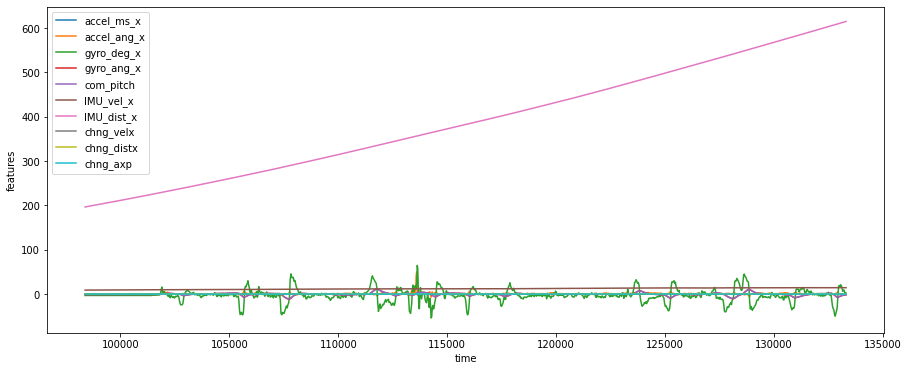

In [ ]:
plt.figure(figsize = (15,6))
visualize_ep(df_3d4,x_features) #x-axis state vairables/features in 3d_translate episode 0

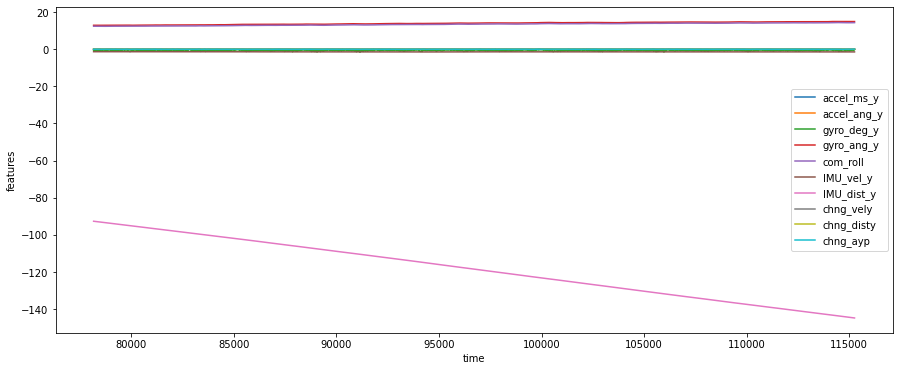

In [ ]:
plt.figure(figsize = (15,6))
visualize_ep(df_gnd1,y_features) #episode 1 of ground hold, UAV was stationary

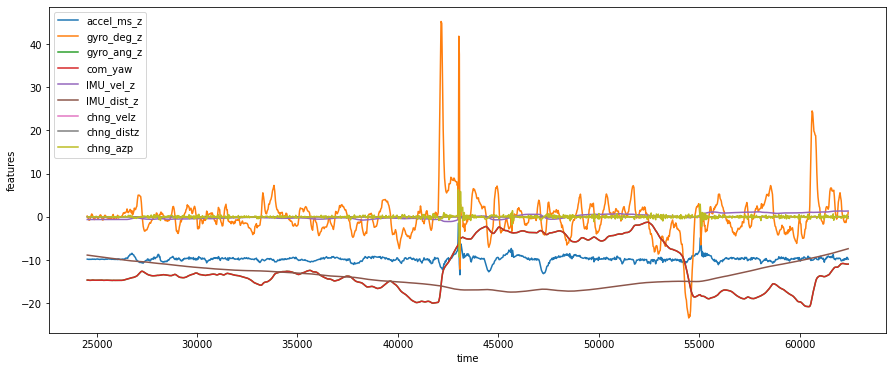

In [ ]:
plt.figure(figsize = (15,6))
visualize_ep(df_3d1,z_features) #z-axis features of episode 1 in 3d_translate  


visualize features with output variable `travel_<axis>` ,axis = x,y,z

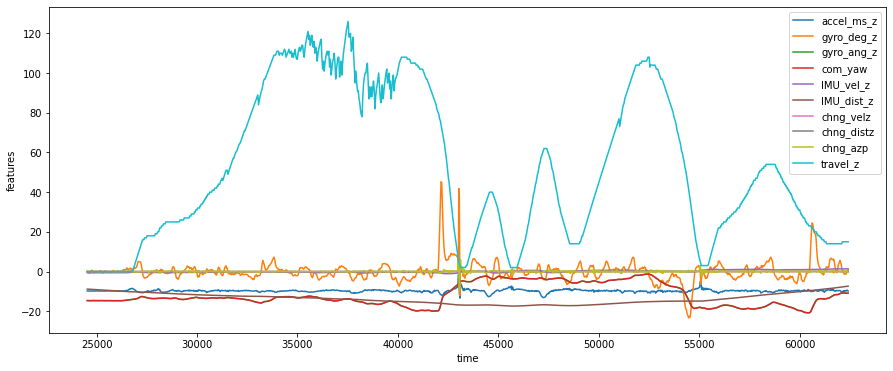

In [ ]:
plt.figure(figsize = (15,6))
with_output = z_features
with_output.append('travel_z') #visualize features with UAV changing altitude
visualize_ep(df_3d1,with_output) #z-axis features of episode 1 in 3d_translate  


##IMU estimation vs ground truth -> HC-sr04

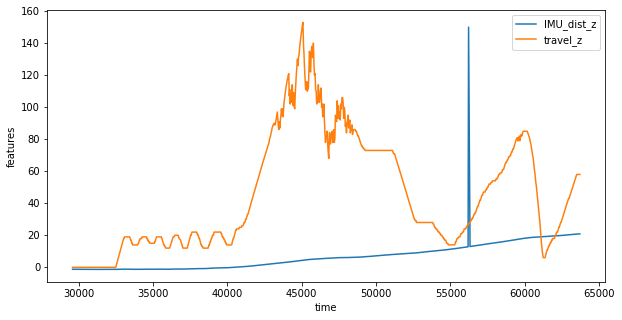

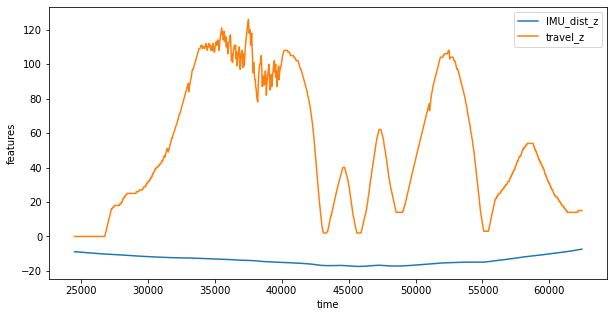

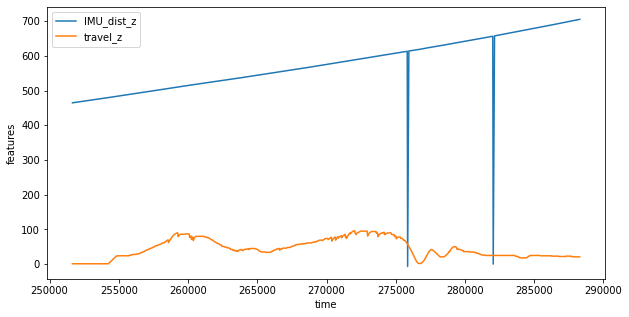

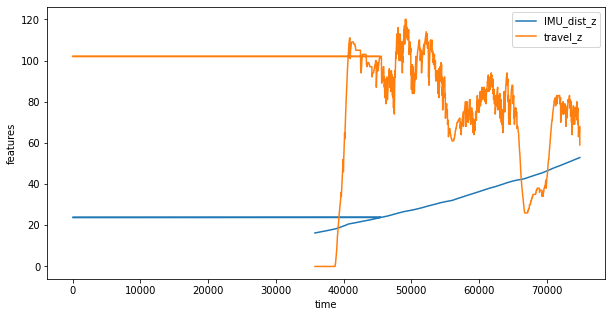

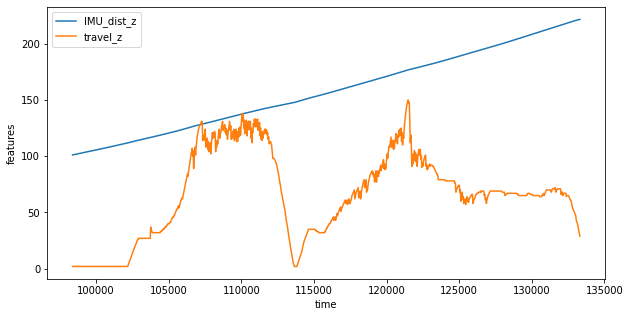

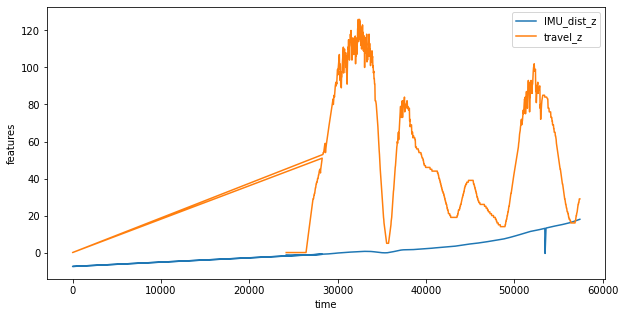

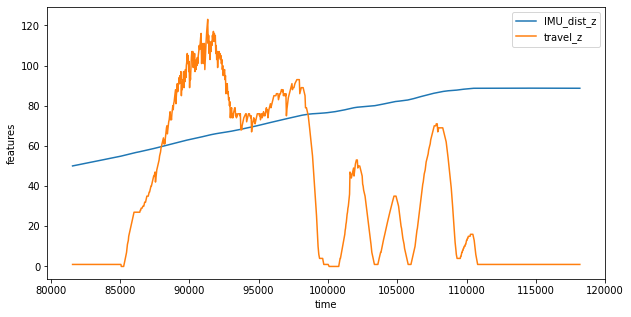

In [ ]:


tds = [df_3d0,df_3d1,df_3d2,df_3d3,df_3d4,df_3d5,df_3d6]
gnds = [df_gnd0,df_gnd1,df_gnd2,df_gnd3]

eps = tds
for ep in eps:
  plt.figure(figsize=(10,5))
  visualize_ep(ep,['IMU_dist_z','travel_z'])



#Feature relationships and correlation

Investigate feature relationships using spearman's rank correlation coefficient

This shows the monotonic relationship between two variables. That is how well the 2 variables can be estimated using a monotonic function irrespective of linearity

In [ ]:
#import seaborn as sns
#plt.figure(figsize = (30,30))
#sns.heatmap(df.corr(method = 'spearman'),annot = True)
#sns.heatmap()

How well the other features monotonically relate with the 3-axis positions `travel_x`, `travel_y`, `travel_z`

The sign for the spearman correlation indicated direction of the monotonic relationship. -ve means one decreases as the other increases and +ve both increase or decrease together. In the context of the data collected, the sign applies similarly. Ignoring the sign means we will only look for ony a changing relationship with no sign of increase or decrease wrt the other. This approach helps to properly rank the relationships between the features and the 3-axis positions, Since this is very much dependent on the amount of data, we assume that collecting more data would better reveal these correlations.



In [ ]:
#plt.figure(figsize = (10,15))
#sns.heatmap(df.corr(method = 'spearman')[['travel_x','travel_y','travel_z']],annot = True)
def spearman_corr(df,signed = False):
  '''if signed return absolute value of correlation. Gives only the magnitude ot relationship'''
  if signed:
    return df.corr(method = 'spearman')[['travel_x','travel_y','travel_z']]
  else: return abs(df.corr(method = 'spearman')[['travel_x','travel_y','travel_z']])


Rank feature relationships. Explore how much of a change in these features contribute to a change in the 3-axis positions

`spearman_corr(episode)`

In [ ]:
c = spearman_corr(df_3d0)
travel_x_c = pd.DataFrame(c.loc[x_features]['travel_x']).sort_values('travel_x',ascending = False)
travel_x_c.style.background_gradient(cmap = 'Greens')


In [ ]:
travel_y_c = pd.DataFrame(c.loc[y_features]['travel_y']).sort_values('travel_y',ascending = False)
travel_y_c.style.background_gradient(cmap = 'Greens')


In [ ]:
travel_z_c = pd.DataFrame(c.loc[z_features]['travel_z']).sort_values('travel_z',ascending = False)
travel_z_c.style.background_gradient(cmap = 'Greens')

#Correlation over data increase

As more data is collected, we assume that the relationships between these variables are better revealed

concatenate episodes

###3d_translate
add all 3d_translate episodes

In [ ]:
df_3d_all = pd.concat([df_3d0,df_3d1,df_3d2,df_3d3,df_3d4,df_3d5,df_3d6])
df_3d_all.shape

(7903, 34)



new correletion of all episodes of 3d translate

In [ ]:
c_3d_all = spearman_corr(df_3d_all)
travel_x_corr_all = pd.DataFrame(c_3d_all.loc[x_features]['travel_x']).sort_values('travel_x',ascending = False)
travel_x_corr_all.style.background_gradient(cmap = 'Greens')

In [ ]:
travel_y_corr_all = pd.DataFrame(c_3d_all.loc[y_features]['travel_y']).sort_values('travel_y',ascending = False)
travel_y_corr_all.style.background_gradient(cmap = 'Greens')

In [ ]:
travel_z_corr_all = pd.DataFrame(c_3d_all.loc[z_features]['travel_z']).sort_values('travel_z',ascending = False)
travel_z_corr_all.style.background_gradient(cmap = 'Greens')

Visualize 3d_translate correlation over data increase

concatenate corr dfs

Funtion to generate correlation relationship over data increase

In [ ]:
def generate_corr(dfs = None,axis_features = None,feature = None):
  correlation_df = pd.DataFrame({})
  previous_correlation_df_T = pd.DataFrame({})
  idx = []
  for i in range(len(dfs)):
      df = pd.concat(dfs[:i+1])
      correlation_df = spearman_corr(df)
      correlation_df_T = pd.DataFrame(correlation_df.loc[axis_features][feature]).sort_values(feature,ascending = False).T
      correlation_df_T = pd.concat([previous_correlation_df_T,correlation_df_T])
      previous_correlation_df_T = correlation_df_T
      idx.append(df.shape[0])
  correlation_df_T.index = idx
  
  return correlation_df_T



##`Travel X`

In [ ]:
#episodes = [df_3d0,df_3d1]

episodes = [df_3d0,df_3d1,df_3d2,df_3d3,df_3d4,df_3d5,df_3d6]

generate_corr(dfs = episodes,axis_features = x_features,feature = 'travel_x').style.background_gradient(cmap = 'Reds',axis  = 1)

<AxesSubplot:>

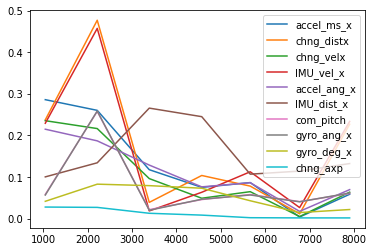

In [ ]:
generate_corr(dfs = episodes,axis_features = x_features,feature = 'travel_x').plot()

##`Travel Y`

In [ ]:

generate_corr(dfs = episodes,axis_features = y_features,feature = 'travel_y').style.background_gradient(cmap = 'Reds',axis  = 1)

Text(0.5, 0, 'sample size')

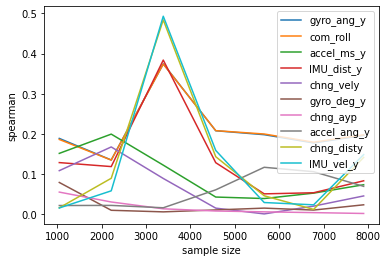

In [ ]:

generate_corr(dfs = episodes,axis_features = y_features,feature = 'travel_y').plot()
plt.ylabel('spearman')
plt.xlabel('sample size')

##`Travel Z`

In [ ]:

generate_corr(dfs = episodes,axis_features = z_features,feature = 'travel_z').style.background_gradient(cmap = 'Reds',axis  = 1)


Text(0.5, 0, 'sample size')

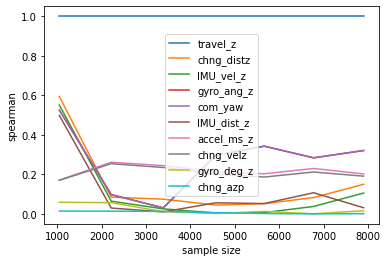

In [ ]:

generate_corr(dfs = episodes,axis_features = z_features,feature = 'travel_z').plot()
plt.ylabel('spearman')
plt.xlabel('sample size')

##Add ground hold to corr_df

##`TRAVEL X`

In [ ]:
plus_gnd_episodes = [df_3d0,df_3d1,df_3d2,df_3d3,df_3d4,df_3d5,df_3d6,df_gnd0,df_gnd1,df_gnd2,df_gnd3]
generate_corr(dfs = plus_gnd_episodes,axis_features = x_features,feature = 'travel_x').style.background_gradient(cmap = 'Greens',axis  = 1)



Text(0.5, 0, 'sample size')

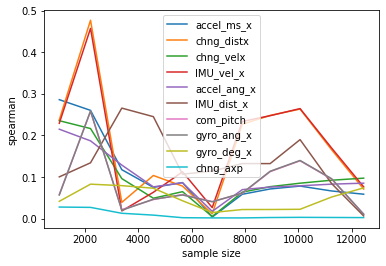

In [ ]:

generate_corr(dfs =  plus_gnd_episodes,axis_features = x_features,feature = 'travel_x').plot()
plt.ylabel('spearman')
plt.xlabel('sample size')

##`TRAVEL Y`

In [ ]:
generate_corr(dfs = plus_gnd_episodes,axis_features = y_features,feature = 'travel_y').style.background_gradient(cmap = 'Greens',axis  = 1)


Text(0.5, 0, 'sample size')

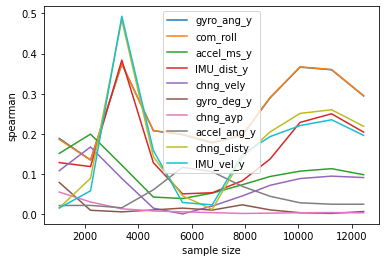

In [ ]:

generate_corr(dfs =  plus_gnd_episodes,axis_features = y_features,feature = 'travel_y').plot()
plt.ylabel('spearman')
plt.xlabel('sample size')

> # Machine Learning `->` Deep Neural Network `->` Black Box Modelling  
------------------------------------

import dependencies

In [ ]:
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

concat all episodes to make entire df

In [ ]:
all_episodes = [df_3d0,df_3d1,df_3d2,df_3d3,df_3d4,df_3d5,df_3d6,df_gnd0,df_gnd1,df_gnd2,df_gnd3]
all_episodes_df = pd.concat(all_episodes)

In [ ]:
all_episodes_df.shape

(12449, 34)

In [ ]:
all_episodes_df

time    dt  travel_x  travel_y  travel_z  accel_ms_x  accel_ms_y  \
1      29594.0  0.03      21.0      -4.0       0.0       -0.01        0.05   
2      29627.0  0.03      21.0      -3.0       0.0        0.03        0.02   
5      29690.0  0.03      22.0       1.0       0.0       -0.02       -0.04   
7      29723.0  0.03      22.0       2.0       0.0        0.02       -0.10   
9      29755.0  0.03      22.0       3.0       0.0        0.02       -0.04   
...        ...   ...       ...       ...       ...         ...         ...   
1991  229022.0  0.03      31.0     -20.0       1.0        0.04       -0.02   
1993  229051.0  0.03      31.0     -15.0       1.0        0.02       -0.03   
1995  229080.0  0.03      31.0     -16.0       1.0        0.01       -0.01   
1997  229107.0  0.03      31.0     -17.0       1.0        0.01       -0.01   
1999  229136.0  0.03      31.0     -18.0       1.0        0.01       -0.04   

      accel_ms_z  accel_ang_x  accel_ang_y  ...  IMU_dist_z  chng_velx  \
1          -9.83          0.0          0.0  ...       -1.22       -0.0   
2          -9.80          0.0          0.0  ...       -1.22        0.0   
5          -9.83          0.0          0.0  ...       -1.23       -0.0   
7          -9.81          0.0          0.0  ...       -1.23        0.0   
9          -9.88          0.0          0.0  ...       -1.23        0.0   
...          ...          ...          ...  ...         ...        ...   
1991       -9.83          0.0          0.0  ...      345.38        0.0   
1993       -9.74          0.0          0.0  ...      345.52        0.0   
1995       -9.77          0.0          0.0  ...      345.65        0.0   
1997       -9.74          0.0          0.0  ...      345.78        0.0   
1999       -9.76          0.0          0.0  ...      345.92        0.0   

      chng_vely  chng_velz  chng_distx  chng_disty  chng_distz  chng_axp  \
1           0.0       -0.0       -0.00       -0.05       -0.00     -0.01   
2           0.0        0.0       -0.00       -0.06       -0.00      0.04   
5          -0.0       -0.0       -0.00       -0.05       -0.00      0.00   
7          -0.0       -0.0       -0.00       -0.06       -0.00      0.04   
9          -0.0       -0.0       -0.00       -0.05       -0.00      0.00   
...         ...        ...         ...         ...         ...       ...   
1991       -0.0       -0.0        0.09       -0.20        0.13      0.03   
1993       -0.0        0.0        0.10       -0.23        0.14     -0.02   
1995       -0.0        0.0        0.10       -0.23        0.14     -0.00   
1997       -0.0        0.0        0.09       -0.21        0.13     -0.01   
1999       -0.0        0.0        0.10       -0.23        0.14      0.00   

      chng_ayp  chng_azp  
1        -0.01     -0.03  
2        -0.02      0.03  
5        -0.01      0.02  
7        -0.05      0.02  
9         0.05     -0.07  
...        ...       ...  
1991      0.04     -0.09  
1993     -0.00      0.09  
1995      0.02     -0.04  
1997     -0.00      0.03  
1999     -0.03     -0.02  

[12449 rows x 34 columns]

In [ ]:
all_episodes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12449 entries, 1 to 1999
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         12449 non-null  float64
 1   dt           12449 non-null  float64
 2   travel_x     12449 non-null  float64
 3   travel_y     12449 non-null  float64
 4   travel_z     12449 non-null  float64
 5   accel_ms_x   12449 non-null  float64
 6   accel_ms_y   12449 non-null  float64
 7   accel_ms_z   12449 non-null  float64
 8   accel_ang_x  12449 non-null  float64
 9   accel_ang_y  12449 non-null  float64
 10  gyro_deg_x   12449 non-null  float64
 11  gyro_deg_y   12449 non-null  float64
 12  gyro_deg_z   12449 non-null  float64
 13  gyro_ang_x   12449 non-null  float64
 14  gyro_ang_y   12449 non-null  float64
 15  gyro_ang_z   12449 non-null  float64
 16  com_pitch    12449 non-null  float64
 17  com_roll     12449 non-null  float64
 18  com_yaw      12449 non-null  float64
 19  IMU_v

separate input and output features

In [ ]:
all_episodes_df.columns,len(all_episodes_df.columns)

(Index(['time', 'dt', 'travel_x', 'travel_y', 'travel_z', 'accel_ms_x',
        'accel_ms_y', 'accel_ms_z', 'accel_ang_x', 'accel_ang_y', 'gyro_deg_x',
        'gyro_deg_y', 'gyro_deg_z', 'gyro_ang_x', 'gyro_ang_y', 'gyro_ang_z',
        'com_pitch', 'com_roll', 'com_yaw', 'IMU_vel_x', 'IMU_vel_y',
        'IMU_vel_z', 'IMU_dist_x', 'IMU_dist_y', 'IMU_dist_z', 'chng_velx',
        'chng_vely', 'chng_velz', 'chng_distx', 'chng_disty', 'chng_distz',
        'chng_axp', 'chng_ayp', 'chng_azp'],
       dtype='object'),
 34)

In [ ]:
output_features = ['travel_x','travel_y','travel_z']
input_features = list(all_episodes_df.columns)
for output_feature in output_features:input_features.remove(output_feature)
input_features

['time',
 'dt',
 'accel_ms_x',
 'accel_ms_y',
 'accel_ms_z',
 'accel_ang_x',
 'accel_ang_y',
 'gyro_deg_x',
 'gyro_deg_y',
 'gyro_deg_z',
 'gyro_ang_x',
 'gyro_ang_y',
 'gyro_ang_z',
 'com_pitch',
 'com_roll',
 'com_yaw',
 'IMU_vel_x',
 'IMU_vel_y',
 'IMU_vel_z',
 'IMU_dist_x',
 'IMU_dist_y',
 'IMU_dist_z',
 'chng_velx',
 'chng_vely',
 'chng_velz',
 'chng_distx',
 'chng_disty',
 'chng_distz',
 'chng_axp',
 'chng_ayp',
 'chng_azp']

In [ ]:
data_input = all_episodes_df[input_features]
data_input

time    dt  accel_ms_x  accel_ms_y  accel_ms_z  accel_ang_x  \
1      29594.0  0.03       -0.01        0.05       -9.83          0.0   
2      29627.0  0.03        0.03        0.02       -9.80          0.0   
5      29690.0  0.03       -0.02       -0.04       -9.83          0.0   
7      29723.0  0.03        0.02       -0.10       -9.81          0.0   
9      29755.0  0.03        0.02       -0.04       -9.88          0.0   
...        ...   ...         ...         ...         ...          ...   
1991  229022.0  0.03        0.04       -0.02       -9.83          0.0   
1993  229051.0  0.03        0.02       -0.03       -9.74          0.0   
1995  229080.0  0.03        0.01       -0.01       -9.77          0.0   
1997  229107.0  0.03        0.01       -0.01       -9.74          0.0   
1999  229136.0  0.03        0.01       -0.04       -9.76          0.0   

      accel_ang_y  gyro_deg_x  gyro_deg_y  gyro_deg_z  ...  IMU_dist_z  \
1             0.0       -3.79       -0.60       -0.11  ...       -1.22   
2             0.0       -4.15       -0.55       -0.16  ...       -1.22   
5             0.0       -4.64       -0.74       -0.02  ...       -1.23   
7             0.0       -4.34       -0.63       -0.09  ...       -1.23   
9             0.0       -3.45       -0.82        0.35  ...       -1.23   
...           ...         ...         ...         ...  ...         ...   
1991          0.0       -3.11       -0.45        0.19  ...      345.38   
1993          0.0       -3.11       -0.62        0.51  ...      345.52   
1995          0.0       -3.21       -0.60        0.17  ...      345.65   
1997          0.0       -3.13       -0.56        0.26  ...      345.78   
1999          0.0       -3.01       -0.54        0.25  ...      345.92   

      chng_velx  chng_vely  chng_velz  chng_distx  chng_disty  chng_distz  \
1          -0.0        0.0       -0.0       -0.00       -0.05       -0.00   
2           0.0        0.0        0.0       -0.00       -0.06       -0.00   
5          -0.0       -0.0       -0.0       -0.00       -0.05       -0.00   
7           0.0       -0.0       -0.0       -0.00       -0.06       -0.00   
9           0.0       -0.0       -0.0       -0.00       -0.05       -0.00   
...         ...        ...        ...         ...         ...         ...   
1991        0.0       -0.0       -0.0        0.09       -0.20        0.13   
1993        0.0       -0.0        0.0        0.10       -0.23        0.14   
1995        0.0       -0.0        0.0        0.10       -0.23        0.14   
1997        0.0       -0.0        0.0        0.09       -0.21        0.13   
1999        0.0       -0.0        0.0        0.10       -0.23        0.14   

      chng_axp  chng_ayp  chng_azp  
1        -0.01     -0.01     -0.03  
2         0.04     -0.02      0.03  
5         0.00     -0.01      0.02  
7         0.04     -0.05      0.02  
9         0.00      0.05     -0.07  
...        ...       ...       ...  
1991      0.03      0.04     -0.09  
1993     -0.02     -0.00      0.09  
1995     -0.00      0.02     -0.04  
1997     -0.01     -0.00      0.03  
1999      0.00     -0.03     -0.02  

[12449 rows x 31 columns]

In [ ]:
data_output = all_episodes_df[output_features]
data_output

travel_x  travel_y  travel_z
1         21.0      -4.0       0.0
2         21.0      -3.0       0.0
5         22.0       1.0       0.0
7         22.0       2.0       0.0
9         22.0       3.0       0.0
...        ...       ...       ...
1991      31.0     -20.0       1.0
1993      31.0     -15.0       1.0
1995      31.0     -16.0       1.0
1997      31.0     -17.0       1.0
1999      31.0     -18.0       1.0

[12449 rows x 3 columns]

scale dataset

In [ ]:
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()
scaled_input = input_scaler.fit_transform(data_input,y = data_output)
scaled_output = output_scaler.fit_transform(data_output)

In [ ]:
scaled_input.shape,scaled_output.shape

((12449, 31), (12449, 3))

In [ ]:
scaled_df = pd.concat([pd.DataFrame(scaled_input,columns = input_features),pd.DataFrame(scaled_output,columns = output_features)],axis = 1)


In [ ]:
scaled_df

time        dt  accel_ms_x  accel_ms_y  accel_ms_z  accel_ang_x  \
0      0.102655  0.932692    0.412262    0.402249    0.379962     0.462069   
1      0.102769  0.932692    0.413672    0.399654    0.381853     0.462069   
2      0.102988  0.932692    0.411910    0.394464    0.379962     0.462069   
3      0.103102  0.932692    0.413319    0.389273    0.381222     0.462069   
4      0.103213  0.932692    0.413319    0.394464    0.376812     0.462069   
...         ...       ...         ...         ...         ...          ...   
12444  0.794432  0.932692    0.414024    0.396194    0.379962     0.462069   
12445  0.794532  0.932692    0.413319    0.395329    0.385633     0.462069   
12446  0.794633  0.932692    0.412967    0.397059    0.383743     0.462069   
12447  0.794726  0.932692    0.412967    0.397059    0.385633     0.462069   
12448  0.794827  0.932692    0.412967    0.394464    0.384373     0.462069   

       accel_ang_y  gyro_deg_x  gyro_deg_y  gyro_deg_z  ...  chng_velz  \
0          0.48125    0.668548    0.029114    0.603904  ...   0.796811   
1          0.48125    0.667830    0.029120    0.603766  ...   0.796811   
2          0.48125    0.666853    0.029098    0.604153  ...   0.796811   
3          0.48125    0.667451    0.029110    0.603959  ...   0.796811   
4          0.48125    0.669226    0.029088    0.605176  ...   0.796811   
...            ...         ...         ...         ...  ...        ...   
12444      0.48125    0.669904    0.029131    0.604733  ...   0.796811   
12445      0.48125    0.669904    0.029112    0.605618  ...   0.796811   
12446      0.48125    0.669705    0.029114    0.604678  ...   0.796811   
12447      0.48125    0.669864    0.029119    0.604927  ...   0.796811   
12448      0.48125    0.670104    0.029121    0.604899  ...   0.796811   

       chng_distx  chng_disty  chng_distz  chng_axp  chng_ayp  chng_azp  \
0        0.532724    0.117295    0.370899  0.637106  0.473728  0.209799   
1        0.532724    0.117261    0.370899  0.637715  0.473562  0.210254   
2        0.532724    0.117295    0.370899  0.637227  0.473728  0.210179   
3        0.532724    0.117261    0.370899  0.637715  0.473065  0.210179   
4        0.532724    0.117295    0.370899  0.637227  0.474722  0.209495   
...           ...         ...         ...       ...       ...       ...   
12444    0.532792    0.116777    0.372585  0.637593  0.474557  0.209343   
12445    0.532800    0.116674    0.372714  0.636984  0.473894  0.210710   
12446    0.532800    0.116674    0.372714  0.637227  0.474225  0.209723   
12447    0.532792    0.116743    0.372585  0.637106  0.473894  0.210254   
12448    0.532800    0.116674    0.372714  0.637227  0.473396  0.209875   

       travel_x  travel_y  travel_z  
0      0.376404  0.568807  0.000000  
1      0.376404  0.577982  0.000000  
2      0.382022  0.614679  0.000000  
3      0.382022  0.623853  0.000000  
4      0.382022  0.633028  0.000000  
...         ...       ...       ...  
12444  0.432584  0.422018  0.006536  
12445  0.432584  0.467890  0.006536  
12446  0.432584  0.458716  0.006536  
12447  0.432584  0.449541  0.006536  
12448  0.432584  0.440367  0.006536  

[12449 rows x 34 columns]

train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,test = train_test_split(scaled_df,test_size = 0.3)

In [ ]:
train.shape

(8714, 34)

In [ ]:
test.shape

(3735, 34)

In [ ]:
train

time        dt  accel_ms_x  accel_ms_y  accel_ms_z  accel_ang_x  \
6724  0.194065  0.932692    0.404863    0.378893    0.406427     0.455172   
4312  0.230199  0.932692    0.411910    0.413495    0.451166     0.468966   
5175  0.406130  0.932692    0.426709    0.417820    0.382483     0.468966   
5401  0.433523  0.932692    0.420719    0.386678    0.354757     0.462069   
6476  0.166443  0.923077    0.397815    0.384083    0.373031     0.462069   
...        ...       ...         ...         ...         ...          ...   
270   0.132254  0.932692    0.392530    0.409170    0.345936     0.462069   
2920  0.950115  0.942308    0.406624    0.429931    0.431002     0.475862   
6503  0.168864  0.932692    0.404863    0.368512    0.408948     0.448276   
2505  0.903866  0.932692    0.405920    0.427336    0.349716     0.468966   
567   0.165489  0.942308    0.404510    0.393599    0.350347     0.462069   

      accel_ang_y  gyro_deg_x  gyro_deg_y  gyro_deg_z  ...  chng_velz  \
6724      0.47500    0.677523    0.028955    0.601084  ...   0.796817   
4312      0.48125    0.686478    0.028632    0.591600  ...   0.796837   
5175      0.49375    0.663024    0.028961    0.600503  ...   0.796811   
5401      0.48750    0.633406    0.029182    0.586375  ...   0.796804   
6476      0.46875    0.730913    0.028013    0.632355  ...   0.796811   
...           ...         ...         ...         ...  ...        ...   
270       0.46250    0.654787    0.028685    0.605148  ...   0.796798   
2920      0.47500    0.660630    0.028853    0.610761  ...   0.796830   
6503      0.47500    0.679797    0.027038    0.611729  ...   0.796817   
2505      0.47500    0.663722    0.029016    0.609572  ...   0.796798   
567       0.47500    0.667591    0.026526    0.592900  ...   0.796798   

      chng_distx  chng_disty  chng_distz  chng_axp  chng_ayp  chng_azp  \
6724    0.532678    0.117088    0.371288  0.638324  0.473728  0.210710   
4312    0.532800    0.118090    0.371158  0.639055  0.472402  0.210103   
5175    0.533021    0.118297    0.372455  0.637958  0.476546  0.210254   
5401    0.533090    0.118574    0.372585  0.639298  0.470413  0.206608   
6476    0.532693    0.117295    0.371158  0.632355  0.469750  0.206836   
...          ...         ...         ...       ...       ...       ...   
270     0.532716    0.117330    0.370899  0.637471  0.475220  0.207824   
2920    0.532785    0.116570    0.374141  0.636009  0.476711  0.211014   
6503    0.532686    0.117261    0.371288  0.638324  0.471739  0.211546   
2505    0.532808    0.116604    0.373363  0.635157  0.477706  0.208735   
567     0.532716    0.117399    0.371028  0.635400  0.475717  0.209495   

      travel_x  travel_y  travel_z  
6724  0.320225  0.467890  0.156863  
4312  0.505618  0.403670  0.241830  
5175  0.325843  0.458716  0.385621  
5401  0.404494  0.605505  0.483660  
6476  0.196629  0.302752  0.111111  
...        ...       ...       ...  
270   0.174157  0.036697  0.117647  
2920  0.679775  0.522936  0.575163  
6503  0.213483  0.458716  0.091503  
2505  0.471910  0.532110  0.522876  
567   0.629213  0.449541  0.692810  

[8714 rows x 34 columns]

In [ ]:
xtrain = train[input_features]
ytrain = train[output_features]
xtest = test[input_features]
ytest = test[output_features]

In [ ]:
xtrain

time        dt  accel_ms_x  accel_ms_y  accel_ms_z  accel_ang_x  \
6724  0.194065  0.932692    0.404863    0.378893    0.406427     0.455172   
4312  0.230199  0.932692    0.411910    0.413495    0.451166     0.468966   
5175  0.406130  0.932692    0.426709    0.417820    0.382483     0.468966   
5401  0.433523  0.932692    0.420719    0.386678    0.354757     0.462069   
6476  0.166443  0.923077    0.397815    0.384083    0.373031     0.462069   
...        ...       ...         ...         ...         ...          ...   
270   0.132254  0.932692    0.392530    0.409170    0.345936     0.462069   
2920  0.950115  0.942308    0.406624    0.429931    0.431002     0.475862   
6503  0.168864  0.932692    0.404863    0.368512    0.408948     0.448276   
2505  0.903866  0.932692    0.405920    0.427336    0.349716     0.468966   
567   0.165489  0.942308    0.404510    0.393599    0.350347     0.462069   

      accel_ang_y  gyro_deg_x  gyro_deg_y  gyro_deg_z  ...  IMU_dist_z  \
6724      0.47500    0.677523    0.028955    0.601084  ...    0.045834   
4312      0.48125    0.686478    0.028632    0.591600  ...    0.082698   
5175      0.49375    0.663024    0.028961    0.600503  ...    0.245740   
5401      0.48750    0.633406    0.029182    0.586375  ...    0.285441   
6476      0.46875    0.730913    0.028013    0.632355  ...    0.033265   
...           ...         ...         ...         ...  ...         ...   
270       0.46250    0.654787    0.028685    0.605148  ...    0.022965   
2920      0.47500    0.660630    0.028853    0.610761  ...    0.855300   
6503      0.47500    0.679797    0.027038    0.611729  ...    0.034081   
2505      0.47500    0.663722    0.029016    0.609572  ...    0.741096   
567       0.47500    0.667591    0.026526    0.592900  ...    0.032531   

      chng_velx  chng_vely  chng_velz  chng_distx  chng_disty  chng_distz  \
6724   0.513709   0.000931   0.796817    0.532678    0.117088    0.371288   
4312   0.514430   0.000969   0.796837    0.532800    0.118090    0.371158   
5175   0.515152   0.000969   0.796811    0.533021    0.118297    0.372455   
5401   0.515152   0.000950   0.796804    0.533090    0.118574    0.372585   
6476   0.513709   0.000950   0.796811    0.532693    0.117295    0.371158   
...         ...        ...        ...         ...         ...         ...   
270    0.512987   0.000950   0.796798    0.532716    0.117330    0.370899   
2920   0.513709   0.000969   0.796830    0.532785    0.116570    0.374141   
6503   0.513709   0.000931   0.796817    0.532686    0.117261    0.371288   
2505   0.513709   0.000969   0.796798    0.532808    0.116604    0.373363   
567    0.513709   0.000950   0.796798    0.532716    0.117399    0.371028   

      chng_axp  chng_ayp  chng_azp  
6724  0.638324  0.473728  0.210710  
4312  0.639055  0.472402  0.210103  
5175  0.637958  0.476546  0.210254  
5401  0.639298  0.470413  0.206608  
6476  0.632355  0.469750  0.206836  
...        ...       ...       ...  
270   0.637471  0.475220  0.207824  
2920  0.636009  0.476711  0.211014  
6503  0.638324  0.471739  0.211546  
2505  0.635157  0.477706  0.208735  
567   0.635400  0.475717  0.209495  

[8714 rows x 31 columns]

Buidl Model

In [ ]:
def create_model(optimizer = None,loss = None):
  model = Sequential()
  model.add(Dense(units = xtrain.shape[1],input_dim = xtrain.shape[1],activation= 'relu'))
  model.add(Dense(units = 64,activation = 'relu'))
  model.add(Dense(units = 128,activation = 'relu'))
  model.add(Dense(units = 256,activation = 'relu'))
  model.add(Dense(units = 512,activation = 'relu'))
  model.add(Dense(units = 256,activation = 'relu'))
  model.add(Dense(units = 128,activation = 'relu'))
  model.add(Dense(units = 64,activation = 'relu'))
  model.add(Dense(units = 8,activation = 'relu'))
  model.add(Dense(units = ytrain.shape[1],activation = 'linear'))
  model.compile(optimizer = optimizer,loss = loss)
  return model

In [ ]:
model = create_model(optimizer='Adam',loss= 'mean_squared_error')

##Model Summary and Architecture

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 31)                992       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2048      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
callbacks = [ModelCheckpoint('accelANN_baseline.hdf5',monitor = 'val_loss',mode = 'min',save_best_only = True,verbose = 1),
             ReduceLROnPlateau(monitor= 'val_loss',factor = 0.1,patience = 10,mode = 'min',verbose = 1)]

In [ ]:
hist = model.fit(x = xtrain,y = ytrain,epochs = 150,callbacks = callbacks,validation_data= (xtest,ytest))

Epoch 1/150
272/273 [============================>.] - ETA: 0s - loss: 0.0337
Epoch 00001: val_loss improved from inf to 0.02309, saving model to accelANN_baseline.hdf5
273/273 [==============================] - 8s 31ms/step - loss: 0.0337 - val_loss: 0.0231
Epoch 2/150
271/273 [============================>.] - ETA: 0s - loss: 0.0224
Epoch 00002: val_loss improved from 0.02309 to 0.02104, saving model to accelANN_baseline.hdf5
273/273 [==============================] - 7s 26ms/step - loss: 0.0224 - val_loss: 0.0210
Epoch 3/150
271/273 [============================>.] - ETA: 0s - loss: 0.0223
Epoch 00003: val_loss did not improve from 0.02104
273/273 [==============================] - 7s 26ms/step - loss: 0.0223 - val_loss: 0.0211
Epoch 4/150
272/273 [============================>.] - ETA: 0s - loss: 0.0207
Epoch 00004: val_loss improved from 0.02104 to 0.01997, saving model to accelANN_baseline.hdf5
273/273 [==============================] - 7s 26ms/step - loss: 0.0207 - val_loss: 0.0

Epoch 67/150
272/273 [============================>.] - ETA: 0s - loss: 0.0018
Epoch 00067: val_loss did not improve from 0.00226
273/273 [==============================] - 6s 23ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 68/150
273/273 [==============================] - ETA: 0s - loss: 0.0018- ETA: 2s  - ETA:  - ETA: 0s - loss:
Epoch 00068: val_loss did not improve from 0.00226
273/273 [==============================] - 7s 27ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 69/150
270/273 [============================>.] - ETA: 0s - loss: 0.0017
Epoch 00069: val_loss improved from 0.00226 to 0.00224, saving model to accelANN_baseline.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 70/150
271/273 [============================>.] - ETA: 0s - loss: 0.0017
Epoch 00070: val_loss improved from 0.00224 to 0.00223, saving model to accelANN_baseline.hdf5
273/273 [==============================] - 7s 25ms/step - loss: 0.0017 - val_loss: 0.0

Epoch 134/150
272/273 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00134: val_loss did not improve from 0.00172
273/273 [==============================] - 6s 22ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 135/150
271/273 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00135: val_loss did not improve from 0.00172
273/273 [==============================] - 6s 23ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 136/150
272/273 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00136: val_loss did not improve from 0.00172
273/273 [==============================] - 8s 28ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 137/150
272/273 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00137: val_loss did not improve from 0.00172
273/273 [==============================] - 7s 27ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 138/150
271/273 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00138: val_loss did not improv

Training History

Text(0, 0.5, 'loss-mean squared error')

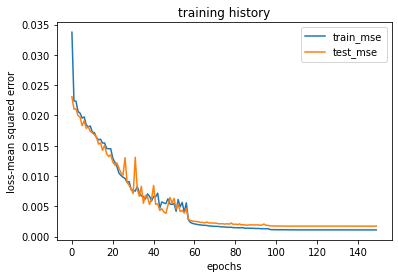

In [ ]:
plt.plot(hist.history['loss'],label = 'train_mse')
plt.plot(hist.history['val_loss'],label = 'test_mse')
plt.legend()
plt.title('training history')
plt.xlabel('epochs')
plt.ylabel('loss-mean squared error')

Training predictions

In [ ]:
pred_on_train = pd.DataFrame(output_scaler.inverse_transform(model.predict(xtrain)),columns = ['travel_x_pred','travel_y_pred','travel_z_pred'])
pred_on_train

travel_x_pred  travel_y_pred  travel_z_pred
0         11.784840     -17.187311      23.974186
1         48.560219     -20.092035      37.498356
2         13.984305     -21.715979      52.677967
3         32.535656       1.307442      69.974419
4        -13.435891     -36.994457      16.243893
...             ...            ...            ...
8709     -10.762987     -55.885155      18.949434
8710      68.033630      -7.245358      84.682518
8711      -6.931726     -22.623573      15.302567
8712      47.867603      -9.154370      80.451447
8713      63.799698     -14.537011     101.618690

[8714 rows x 3 columns]

Training ground truth

In [ ]:
train_ground_truth = pd.DataFrame(output_scaler.inverse_transform(ytrain),columns = output_features)
train_ground_truth

travel_x  travel_y  travel_z
0         11.0     -15.0      24.0
1         44.0     -22.0      37.0
2         12.0     -16.0      59.0
3         26.0       0.0      74.0
4        -11.0     -33.0      17.0
...        ...       ...       ...
8709     -15.0     -62.0      18.0
8710      75.0      -9.0      88.0
8711      -8.0     -16.0      14.0
8712      38.0      -8.0      80.0
8713      66.0     -17.0     106.0

[8714 rows x 3 columns]

In [ ]:
from sklearn.metrics import r2_score


Training R2- coefficient of determination

In [ ]:
r2_score(train_ground_truth,pred_on_train)

0.9660144093795789

Mean squared error on training data

In [ ]:
model.evaluate(x = xtrain,y = ytrain)

273/273 [==============================] - 3s 10ms/step - loss: 0.0011


0.0010990833397954702

In [ ]:
train_ground_truth_and_pred = pd.concat([train_ground_truth,pred_on_train],axis = 1)
train_ground_truth_and_pred

travel_x  travel_y  travel_z  travel_x_pred  travel_y_pred  \
0         11.0     -15.0      24.0      11.784840     -17.187311   
1         44.0     -22.0      37.0      48.560219     -20.092035   
2         12.0     -16.0      59.0      13.984305     -21.715979   
3         26.0       0.0      74.0      32.535656       1.307442   
4        -11.0     -33.0      17.0     -13.435891     -36.994457   
...        ...       ...       ...            ...            ...   
8709     -15.0     -62.0      18.0     -10.762987     -55.885155   
8710      75.0      -9.0      88.0      68.033630      -7.245358   
8711      -8.0     -16.0      14.0      -6.931726     -22.623573   
8712      38.0      -8.0      80.0      47.867603      -9.154370   
8713      66.0     -17.0     106.0      63.799698     -14.537011   

      travel_z_pred  
0         23.974186  
1         37.498356  
2         52.677967  
3         69.974419  
4         16.243893  
...             ...  
8709      18.949434  
8710      84.682518  
8711      15.302567  
8712      80.451447  
8713     101.618690  

[8714 rows x 6 columns]

##Visualize training predictions on UAV position





##`Travel_X`

(0.0, 500.0)

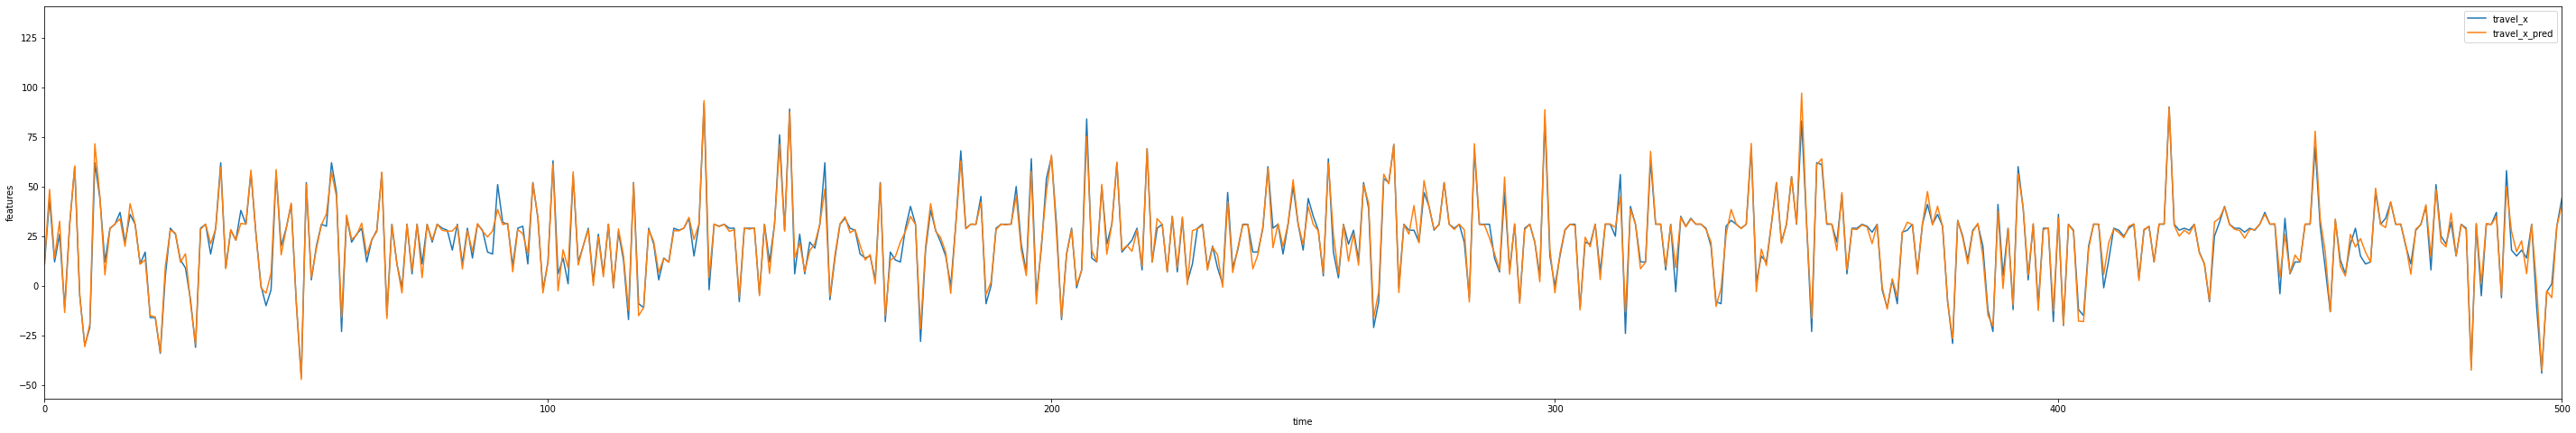

In [ ]:
plt.figure(figsize = (50,8))
visualize_ep(train_ground_truth_and_pred,['travel_x','travel_x_pred'],custom_x = train_ground_truth_and_pred.index)
plt.xlim([0,500]) #window size


##`Travel_Y`

(0.0, 500.0)

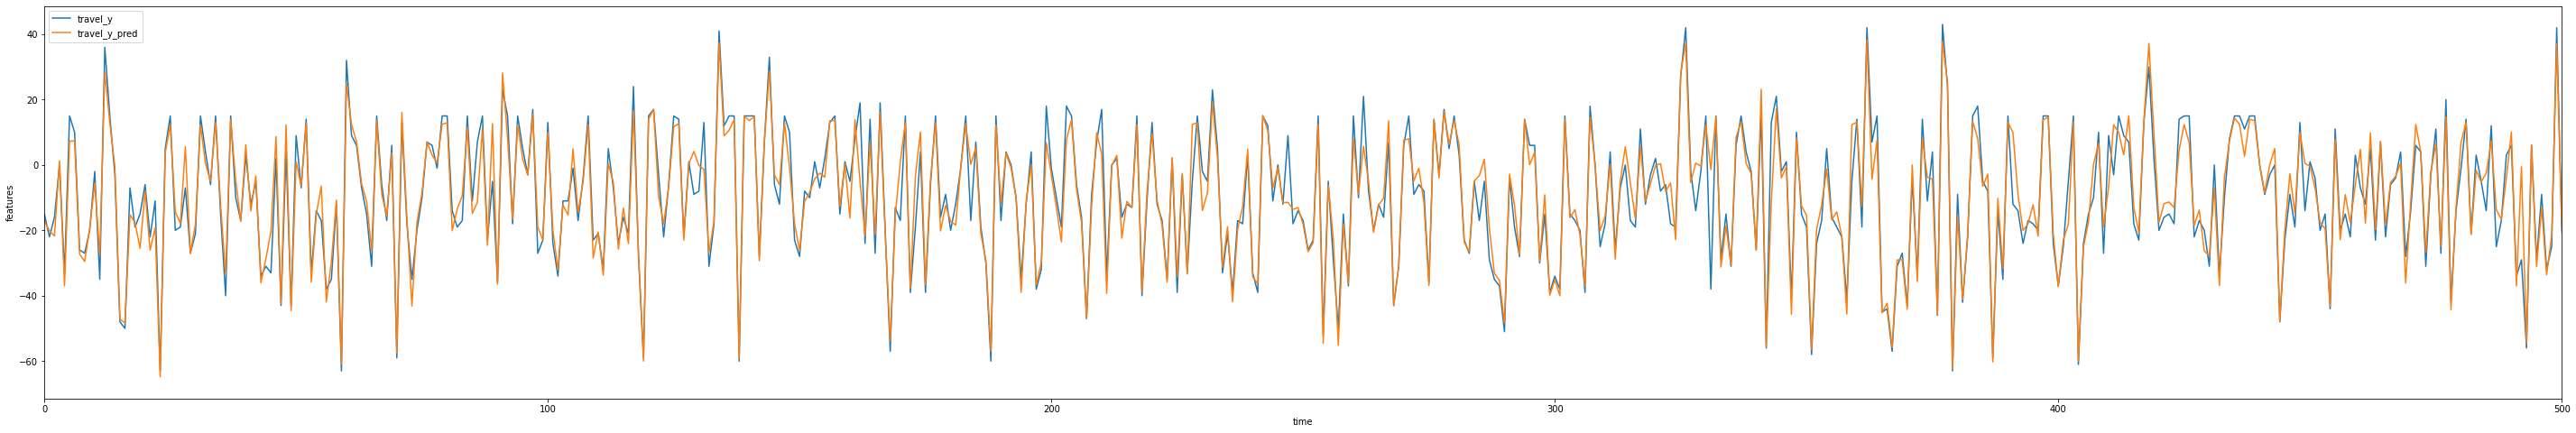

In [ ]:
plt.figure(figsize = (50,8))
visualize_ep(train_ground_truth_and_pred,['travel_y','travel_y_pred'],custom_x = train_ground_truth_and_pred.index)
plt.xlim([0,500])

##`Travel_X` altitude

(0.0, 500.0)

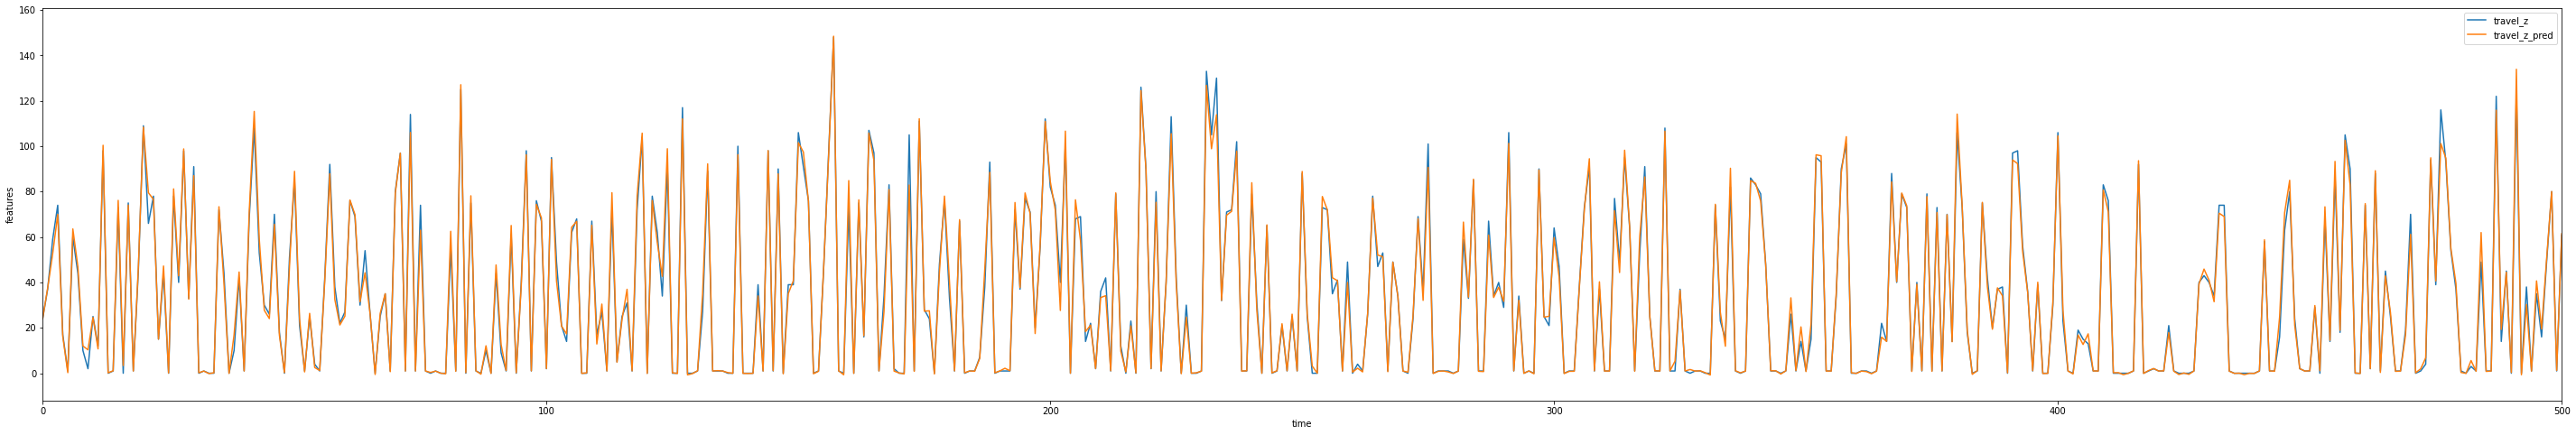

In [ ]:
plt.figure(figsize = (50,8))
visualize_ep(train_ground_truth_and_pred,['travel_z','travel_z_pred'],custom_x = train_ground_truth_and_pred.index)
plt.xlim([0,500])

#Testing

Predictions on testing / unseen data

In [ ]:
pred_on_test = pd.DataFrame(output_scaler.inverse_transform(model.predict(xtest)),columns = ['travel_x_pred','travel_y_pred','travel_z_pred'])
pred_on_test

travel_x_pred  travel_y_pred  travel_z_pred
0         31.309126     -11.712410       1.095091
1         84.150520     -36.278187      52.894276
2         28.520369      14.077196      -0.003278
3         28.691364      12.670037       0.237504
4         30.779377     -26.825085       5.376786
...             ...            ...            ...
3730      31.107718       0.427397       0.980931
3731      98.285217      -7.955717       5.296662
3732      20.180492      -5.273125      -0.093587
3733      30.914320       7.128501       0.987082
3734      30.950106     -17.956995       1.005164

[3735 rows x 3 columns]

Ground truth of Testing data - UAV positions 

In [ ]:
test_ground_truth = pd.DataFrame(output_scaler.inverse_transform(ytest),columns = output_features)
test_ground_truth

travel_x  travel_y  travel_z
0         31.0      -1.0       1.0
1         82.0     -37.0      52.0
2         29.0      15.0       0.0
3         29.0      15.0       0.0
4         27.0     -25.0       1.0
...        ...       ...       ...
3730      31.0      -4.0       1.0
3731     101.0      -5.0       1.0
3732      20.0     -11.0       0.0
3733      31.0       7.0       1.0
3734      31.0     -11.0       1.0

[3735 rows x 3 columns]

R2 score - coefficient of determination - testing data

In [ ]:
r2_score(test_ground_truth,pred_on_test)

0.9441186955620507

Testing data Mean- squard error

In [ ]:
model.evaluate(x = xtest,y = ytest)

117/117 [==============================] - 1s 7ms/step - loss: 0.0017


0.0017265211790800095

In [ ]:
test_ground_truth_and_pred = pd.concat([test_ground_truth,pred_on_test],axis = 1)
test_ground_truth_and_pred

travel_x  travel_y  travel_z  travel_x_pred  travel_y_pred  \
0         31.0      -1.0       1.0      31.309126     -11.712410   
1         82.0     -37.0      52.0      84.150520     -36.278187   
2         29.0      15.0       0.0      28.520369      14.077196   
3         29.0      15.0       0.0      28.691364      12.670037   
4         27.0     -25.0       1.0      30.779377     -26.825085   
...        ...       ...       ...            ...            ...   
3730      31.0      -4.0       1.0      31.107718       0.427397   
3731     101.0      -5.0       1.0      98.285217      -7.955717   
3732      20.0     -11.0       0.0      20.180492      -5.273125   
3733      31.0       7.0       1.0      30.914320       7.128501   
3734      31.0     -11.0       1.0      30.950106     -17.956995   

      travel_z_pred  
0          1.095091  
1         52.894276  
2         -0.003278  
3          0.237504  
4          5.376786  
...             ...  
3730       0.980931  
3731       5.296662  
3732      -0.093587  
3733       0.987082  
3734       1.005164  

[3735 rows x 6 columns]

Visualizations on positions of UAV Testing unseen data

#`Travel_X`

(0.0, 500.0)

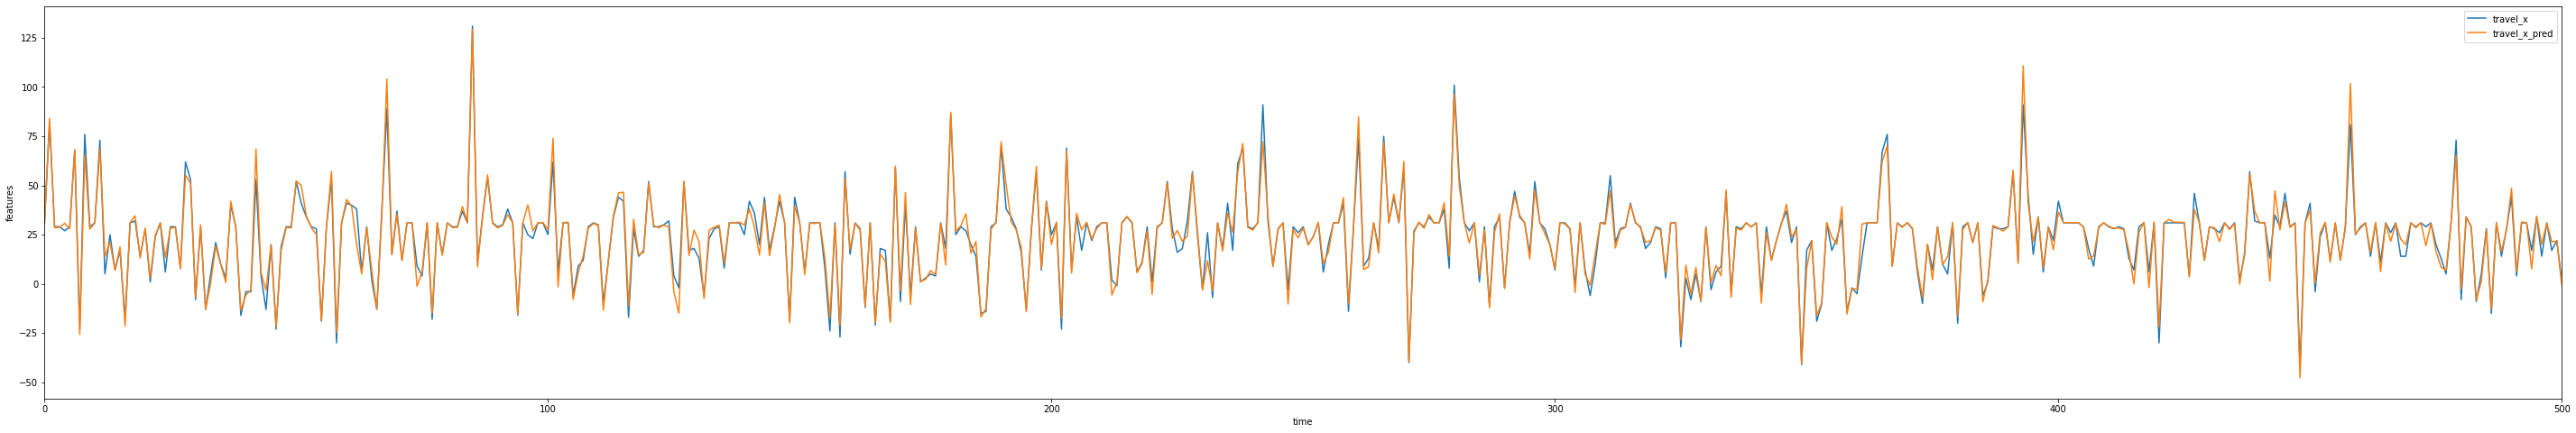

In [ ]:
plt.figure(figsize = (50,8))
visualize_ep(test_ground_truth_and_pred,['travel_x','travel_x_pred'],custom_x = test_ground_truth_and_pred.index)
plt.xlim([0,500])

#`Travel_Y`

(0.0, 500.0)

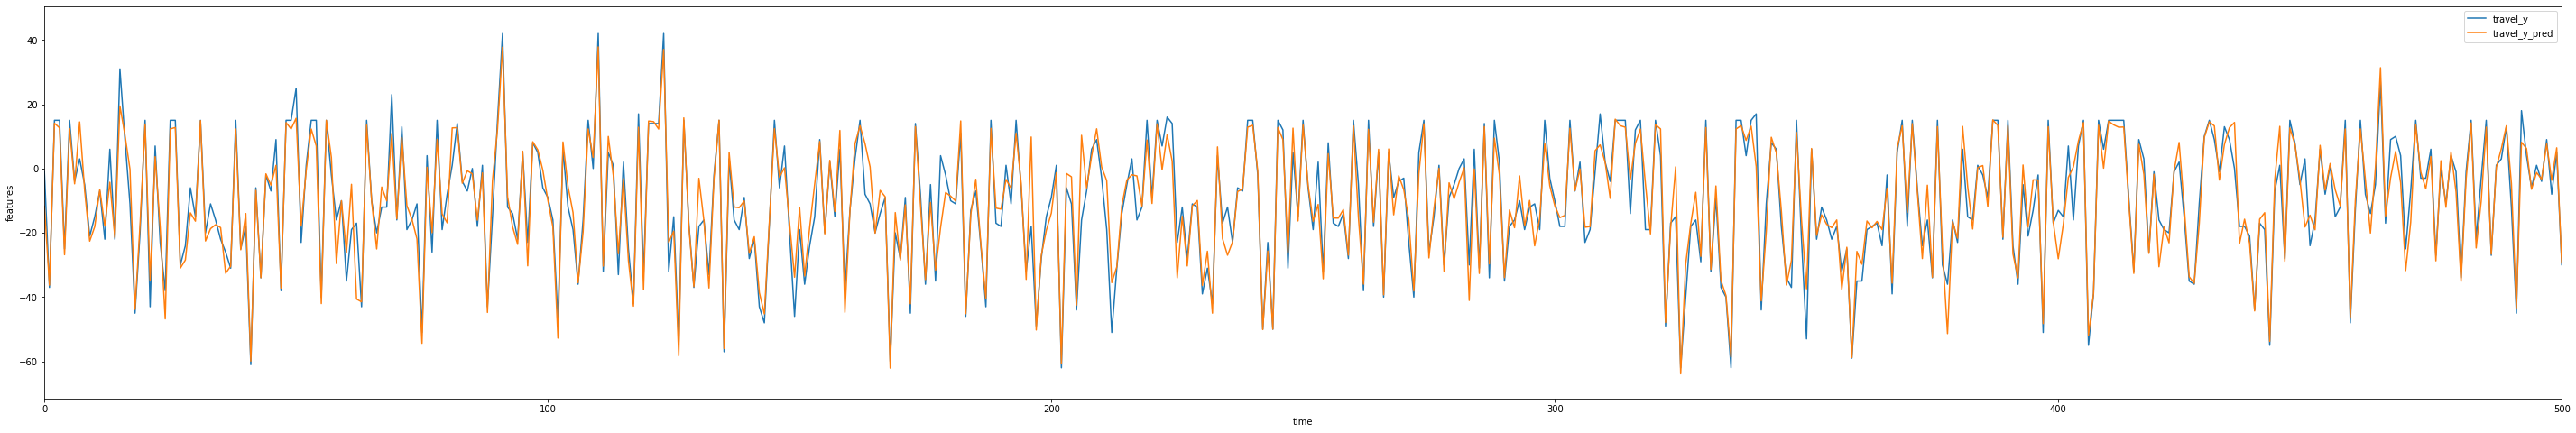

In [ ]:
plt.figure(figsize = (50,8))
visualize_ep(test_ground_truth_and_pred,['travel_y','travel_y_pred'],custom_x = test_ground_truth_and_pred.index)
plt.xlim([0,500])

#`Travel_Z` - altitude

(0.0, 500.0)

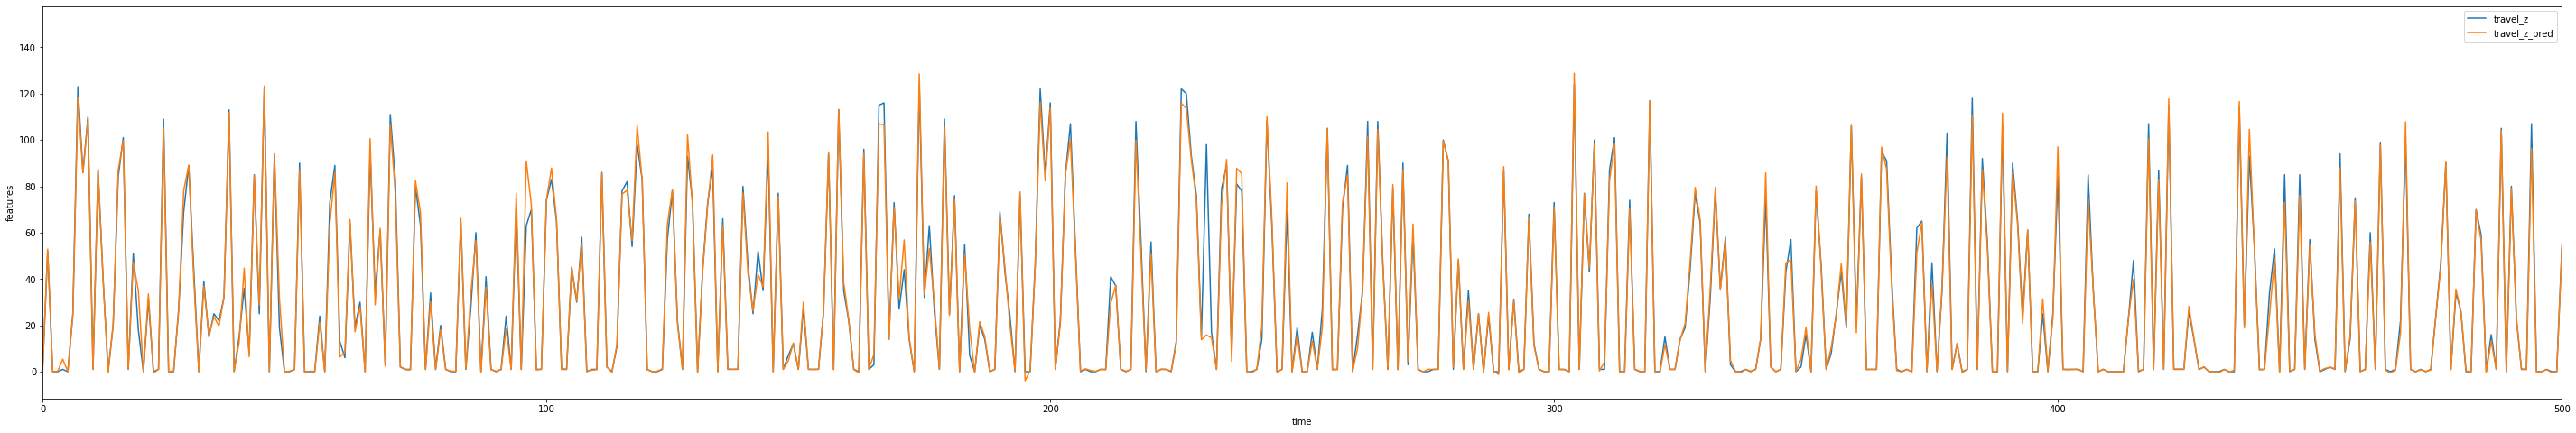

In [ ]:
plt.figure(figsize = (50,8))
visualize_ep(test_ground_truth_and_pred,['travel_z','travel_z_pred'],custom_x = test_ground_truth_and_pred.index)
plt.xlim([0,500])

#Other Models
Try on different optimizers and loss functions

In [ ]:
from keras.metrics import RootMeanSquaredError

List of optimizers and loss functions

In [ ]:
optimizers = ['SGD','RMSprop','Adam','Adadelta','Adagrad','Nadam']
loss_fncs = ['mean_squared_error','mean_absolute_error','mean_squared_logarithmic_error']          #,'cosine_similarity']

This functions runs an experiment by training the same model architecture by cycling and pairing an optimizer with a loss funtion and returns the result of the experiments as model evaluation / performance

In [ ]:

#for loss in loss_fncs:
#  for optimizer in optimizers:
def train_on_optimizer_loss(optimizer = None,loss = None,epochs = 1):
      model = create_model(optimizer=optimizer,loss = loss)
      model_name = 'accelANN_'+loss+'_'+optimizer
      print('training',model_name)
      callbacks = [ModelCheckpoint(model_name+'.hdf5',monitor = 'val_loss',mode = 'min',save_best_only = True,verbose = 1),
              ReduceLROnPlateau(monitor= 'val_loss',factor = 0.1,patience = 10,mode = 'min',verbose = 1)]
      

      hist = model.fit(x = xtrain,y = ytrain,epochs = epochs,callbacks = callbacks,validation_data= (xtest,ytest))

      pred_on_train = pd.DataFrame(output_scaler.inverse_transform(model.predict(xtrain)),columns = ['travel_x_pred','travel_y_pred','travel_z_pred'])
      train_ground_truth = pd.DataFrame(output_scaler.inverse_transform(ytrain),columns = output_features)

      test_ground_truth = pd.DataFrame(output_scaler.inverse_transform(ytest),columns = output_features)
      pred_on_test = pd.DataFrame(output_scaler.inverse_transform(model.predict(xtest)),columns = ['travel_x_pred','travel_y_pred','travel_z_pred'])


      model_r2_train = r2_score(train_ground_truth,pred_on_train)
      model_r2_test = r2_score(test_ground_truth,pred_on_test)
      model_train_loss = model.evaluate(x = xtrain,y = ytrain)
      model_test_loss = model.evaluate(x = xtest,y = ytest)

      print('modelR2 on train: ',model_r2_train,'model R2 on test: ',model_r2_test,'model train loss: ',model_train_loss,'model test loss :',model_test_loss)
      return [hist,model_r2_train,model_r2_test,model_train_loss,model_test_loss,model_name]
    

In [ ]:
model_info = {}
for loss in loss_fncs:
  for optimizer in optimizers:
      m = train_on_optimizer_loss(optimizer = optimizer,loss = loss,epochs = 150)
      model_info[m[-1]] = m

training accelANN_mean_squared_error_SGD
Epoch 1/150
272/273 [============================>.] - ETA: 0s - loss: 0.0462
Epoch 00001: val_loss improved from inf to 0.03681, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [==============================] - 8s 28ms/step - loss: 0.0462 - val_loss: 0.0368
Epoch 2/150
271/273 [============================>.] - ETA: 0s - loss: 0.0365
Epoch 00002: val_loss improved from 0.03681 to 0.03628, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 0.0365 - val_loss: 0.0363
Epoch 3/150
271/273 [============================>.] - ETA: 0s - loss: 0.0362
Epoch 00003: val_loss improved from 0.03628 to 0.03598, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [==============================] - 8s 28ms/step - loss: 0.0362 - val_loss: 0.0360
Epoch 4/150
272/273 [============================>.] - ETA: 0s - loss: 0.0359
Epoch 00004: val_loss improved from 0.03598 to 0.03577

273/273 [==============================] - 7s 25ms/step - loss: 0.0246 - val_loss: 0.0245
Epoch 31/150
272/273 [============================>.] - ETA: 0s - loss: 0.0244
Epoch 00031: val_loss improved from 0.02447 to 0.02429, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [==============================] - 6s 23ms/step - loss: 0.0244 - val_loss: 0.0243
Epoch 32/150
272/273 [============================>.] - ETA: 0s - loss: 0.0242
Epoch 00032: val_loss improved from 0.02429 to 0.02417, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [==============================] - 7s 26ms/step - loss: 0.0241 - val_loss: 0.0242
Epoch 33/150
271/273 [============================>.] - ETA: 0s - loss: 0.0240
Epoch 00033: val_loss improved from 0.02417 to 0.02394, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 0.0240 - val_loss: 0.0239
Epoch 34/150
273/273 [==============================] - ETA: 0s - loss: 0.02

Epoch 62/150
272/273 [============================>.] - ETA: 0s - loss: 0.0220
Epoch 00062: val_loss improved from 0.02192 to 0.02185, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [==============================] - 6s 24ms/step - loss: 0.0220 - val_loss: 0.0218
Epoch 63/150
272/273 [============================>.] - ETA: 0s - loss: 0.0220
Epoch 00063: val_loss improved from 0.02185 to 0.02182, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 0.0220 - val_loss: 0.0218
Epoch 64/150
272/273 [============================>.] - ETA: 0s - loss: 0.0220
Epoch 00064: val_loss did not improve from 0.02182
273/273 [==============================] - 5s 20ms/step - loss: 0.0219 - val_loss: 0.0219
Epoch 65/150
272/273 [============================>.] - ETA: 0s - loss: 0.0219
Epoch 00065: val_loss improved from 0.02182 to 0.02175, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [===========================

Epoch 96/150
270/273 [============================>.] - ETA: 0s - loss: 0.0212
Epoch 00096: val_loss did not improve from 0.02111

Epoch 00096: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
273/273 [==============================] - 6s 24ms/step - loss: 0.0212 - val_loss: 0.0212
Epoch 97/150
272/273 [============================>.] - ETA: 0s - loss: 0.0210
Epoch 00097: val_loss improved from 0.02111 to 0.02088, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.0210 - val_loss: 0.0209
Epoch 98/150
270/273 [============================>.] - ETA: 0s - loss: 0.0210
Epoch 00098: val_loss improved from 0.02088 to 0.02087, saving model to accelANN_mean_squared_error_SGD.hdf5
273/273 [==============================] - 5s 20ms/step - loss: 0.0210 - val_loss: 0.0209
Epoch 99/150
271/273 [============================>.] - ETA: 0s - loss: 0.0210
Epoch 00099: val_loss did not improve from 0.02087
273/273 [====

Epoch 130/150
270/273 [============================>.] - ETA: 0s - loss: 0.0210
Epoch 00130: val_loss did not improve from 0.02084
273/273 [==============================] - 5s 19ms/step - loss: 0.0209 - val_loss: 0.0208
Epoch 131/150
273/273 [==============================] - ETA: 0s - loss: 0.0209
Epoch 00131: val_loss did not improve from 0.02084
273/273 [==============================] - 5s 20ms/step - loss: 0.0209 - val_loss: 0.0208
Epoch 132/150
271/273 [============================>.] - ETA: 0s - loss: 0.0209
Epoch 00132: val_loss did not improve from 0.02084
273/273 [==============================] - 5s 20ms/step - loss: 0.0209 - val_loss: 0.0208
Epoch 133/150
271/273 [============================>.] - ETA: 0s - loss: 0.0209
Epoch 00133: val_loss did not improve from 0.02084
273/273 [==============================] - 6s 20ms/step - loss: 0.0209 - val_loss: 0.0208
Epoch 134/150
272/273 [============================>.] - ETA: 0s - loss: 0.0210
Epoch 00134: val_loss did not improv

Epoch 13/150
271/273 [============================>.] - ETA: 0s - loss: 0.0160
Epoch 00013: val_loss did not improve from 0.01479
273/273 [==============================] - 6s 22ms/step - loss: 0.0160 - val_loss: 0.0174
Epoch 14/150
273/273 [==============================] - ETA: 0s - loss: 0.0156
Epoch 00014: val_loss did not improve from 0.01479
273/273 [==============================] - 7s 25ms/step - loss: 0.0156 - val_loss: 0.0171
Epoch 15/150
270/273 [============================>.] - ETA: 0s - loss: 0.0154
Epoch 00015: val_loss improved from 0.01479 to 0.01371, saving model to accelANN_mean_squared_error_RMSprop.hdf5
273/273 [==============================] - 7s 26ms/step - loss: 0.0154 - val_loss: 0.0137
Epoch 16/150
273/273 [==============================] - ETA: 0s - loss: 0.0152
Epoch 00016: val_loss did not improve from 0.01371
273/273 [==============================] - 7s 27ms/step - loss: 0.0152 - val_loss: 0.0150
Epoch 17/150
270/273 [============================>.] - ET

273/273 [==============================] - 6s 23ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 80/150
270/273 [============================>.] - ETA: 0s - loss: 0.0018
Epoch 00080: val_loss did not improve from 0.00224
273/273 [==============================] - 6s 21ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 81/150
271/273 [============================>.] - ETA: 0s - loss: 0.0018
Epoch 00081: val_loss did not improve from 0.00224
273/273 [==============================] - 6s 21ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 82/150
271/273 [============================>.] - ETA: 0s - loss: 0.0018- ETA: 0s - 
Epoch 00082: val_loss did not improve from 0.00224
273/273 [==============================] - 6s 22ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 83/150
273/273 [==============================] - ETA: 0s - loss: 0.0018
Epoch 00083: val_loss did not improve from 0.00224
273/273 [==============================] - 6s 21ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 84/150
271/2

273/273 [==============================] - 7s 27ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 112/150
272/273 [============================>.] - ETA: 0s - loss: 0.0014
Epoch 00112: val_loss improved from 0.00194 to 0.00194, saving model to accelANN_mean_squared_error_RMSprop.hdf5
273/273 [==============================] - 7s 26ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 113/150
271/273 [============================>.] - ETA: 0s - loss: 0.0014
Epoch 00113: val_loss improved from 0.00194 to 0.00194, saving model to accelANN_mean_squared_error_RMSprop.hdf5
273/273 [==============================] - 7s 25ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 114/150
271/273 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 00114: val_loss improved from 0.00194 to 0.00194, saving model to accelANN_mean_squared_error_RMSprop.hdf5
273/273 [==============================] - 7s 26ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 115/150
272/273 [============================>.] - ETA:

Epoch 143/150
270/273 [============================>.] - ETA: 0s - loss: 0.0014
Epoch 00143: val_loss did not improve from 0.00194
273/273 [==============================] - 7s 25ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 144/150
271/273 [============================>.] - ETA: 0s - loss: 0.0014
Epoch 00144: val_loss did not improve from 0.00194
273/273 [==============================] - 7s 26ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 145/150
273/273 [==============================] - ETA: 0s - loss: 0.0014
Epoch 00145: val_loss did not improve from 0.00194
273/273 [==============================] - 7s 25ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 146/150
271/273 [============================>.] - ETA: 0s - loss: 0.0014
Epoch 00146: val_loss did not improve from 0.00194
273/273 [==============================] - 7s 25ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 147/150
271/273 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 00147: val_loss did not improv

Epoch 25/150
271/273 [============================>.] - ETA: 0s - loss: 0.0080- ETA: 0s - loss:
Epoch 00025: val_loss improved from 0.00746 to 0.00630, saving model to accelANN_mean_squared_error_Adam.hdf5
273/273 [==============================] - 6s 24ms/step - loss: 0.0080 - val_loss: 0.0063
Epoch 26/150
270/273 [============================>.] - ETA: 0s - loss: 0.0089
Epoch 00026: val_loss did not improve from 0.00630
273/273 [==============================] - 7s 24ms/step - loss: 0.0089 - val_loss: 0.0077
Epoch 27/150
271/273 [============================>.] - ETA: 0s - loss: 0.0072
Epoch 00027: val_loss did not improve from 0.00630
273/273 [==============================] - 7s 25ms/step - loss: 0.0072 - val_loss: 0.0080
Epoch 28/150
272/273 [============================>.] - ETA: 0s - loss: 0.0076
Epoch 00028: val_loss did not improve from 0.00630
273/273 [==============================] - 7s 25ms/step - loss: 0.0076 - val_loss: 0.0099
Epoch 29/150
272/273 [======================

271/273 [============================>.] - ETA: 0s - loss: 0.0021
Epoch 00059: val_loss improved from 0.00246 to 0.00233, saving model to accelANN_mean_squared_error_Adam.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 60/150
272/273 [============================>.] - ETA: 0s - loss: 0.0020
Epoch 00060: val_loss improved from 0.00233 to 0.00226, saving model to accelANN_mean_squared_error_Adam.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 61/150
270/273 [============================>.] - ETA: 0s - loss: 0.0019
Epoch 00061: val_loss improved from 0.00226 to 0.00220, saving model to accelANN_mean_squared_error_Adam.hdf5
273/273 [==============================] - 6s 22ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 62/150
272/273 [============================>.] - ETA: 0s - loss: 0.0019- ETA: 0s -
Epoch 00062: val_loss improved from 0.00220 to 0.00215, saving model to accelANN_mean_

Epoch 92/150
272/273 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 00092: val_loss did not improve from 0.00157
273/273 [==============================] - 5s 20ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 93/150
273/273 [==============================] - ETA: 0s - loss: 0.0013
Epoch 00093: val_loss did not improve from 0.00157

Epoch 00093: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
273/273 [==============================] - 5s 20ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 94/150
273/273 [==============================] - ETA: 0s - loss: 0.0011
Epoch 00094: val_loss improved from 0.00157 to 0.00149, saving model to accelANN_mean_squared_error_Adam.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 95/150
271/273 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00095: val_loss did not improve from 0.00149
273/273 [==============================] - 6s 20ms/step - loss: 0.001

271/273 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00123: val_loss did not improve from 0.00147
273/273 [==============================] - 7s 27ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 124/150
271/273 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00124: val_loss did not improve from 0.00147

Epoch 00124: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
273/273 [==============================] - 7s 26ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 125/150
272/273 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00125: val_loss did not improve from 0.00147
273/273 [==============================] - 7s 27ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 126/150
271/273 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 00126: val_loss did not improve from 0.00147
273/273 [==============================] - 8s 28ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 127/150
270/273 [==========================

273/273 [==============================] - 10s 36ms/step - loss: 0.1143 - val_loss: 0.1012
Epoch 6/150
272/273 [============================>.] - ETA: 0s - loss: 0.0912
Epoch 00006: val_loss improved from 0.10123 to 0.07870, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 0.0912 - val_loss: 0.0787
Epoch 7/150
272/273 [============================>.] - ETA: 0s - loss: 0.0700
Epoch 00007: val_loss improved from 0.07870 to 0.06029, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 6s 24ms/step - loss: 0.0700 - val_loss: 0.0603
Epoch 8/150
273/273 [==============================] - ETA: 0s - loss: 0.0546
Epoch 00008: val_loss improved from 0.06029 to 0.04872, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 7s 26ms/step - loss: 0.0546 - val_loss: 0.0487
Epoch 9/150
272/273 [============================>.] - ETA: 0s 

273/273 [==============================] - 8s 30ms/step - loss: 0.0358 - val_loss: 0.0357
Epoch 35/150
273/273 [==============================] - ETA: 0s - loss: 0.0357
Epoch 00035: val_loss improved from 0.03567 to 0.03565, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 7s 27ms/step - loss: 0.0357 - val_loss: 0.0356
Epoch 36/150
273/273 [==============================] - ETA: 0s - loss: 0.0357
Epoch 00036: val_loss improved from 0.03565 to 0.03562, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 7s 27ms/step - loss: 0.0357 - val_loss: 0.0356
Epoch 37/150
270/273 [============================>.] - ETA: 0s - loss: 0.0357- 
Epoch 00037: val_loss improved from 0.03562 to 0.03560, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 8s 29ms/step - loss: 0.0357 - val_loss: 0.0356
Epoch 38/150
270/273 [============================>.] - ETA

273/273 [==============================] - 7s 24ms/step - loss: 0.0353 - val_loss: 0.0351
Epoch 64/150
273/273 [==============================] - ETA: 0s - loss: 0.0353
Epoch 00064: val_loss improved from 0.03514 to 0.03513, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 6s 22ms/step - loss: 0.0353 - val_loss: 0.0351
Epoch 65/150
271/273 [============================>.] - ETA: 0s - loss: 0.0353
Epoch 00065: val_loss improved from 0.03513 to 0.03511, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.0352 - val_loss: 0.0351
Epoch 66/150
273/273 [==============================] - ETA: 0s - loss: 0.0352
Epoch 00066: val_loss improved from 0.03511 to 0.03510, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 6s 22ms/step - loss: 0.0352 - val_loss: 0.0351
Epoch 67/150
272/273 [============================>.] - ETA: 

273/273 [==============================] - 6s 23ms/step - loss: 0.0348 - val_loss: 0.0347
Epoch 93/150
271/273 [============================>.] - ETA: 0s - loss: 0.0349
Epoch 00093: val_loss improved from 0.03470 to 0.03468, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 6s 22ms/step - loss: 0.0348 - val_loss: 0.0347
Epoch 94/150
273/273 [==============================] - ETA: 0s - loss: 0.0348
Epoch 00094: val_loss improved from 0.03468 to 0.03467, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 6s 23ms/step - loss: 0.0348 - val_loss: 0.0347
Epoch 95/150
272/273 [============================>.] - ETA: 0s - loss: 0.0348
Epoch 00095: val_loss improved from 0.03467 to 0.03465, saving model to accelANN_mean_squared_error_Adadelta.hdf5
273/273 [==============================] - 6s 23ms/step - loss: 0.0348 - val_loss: 0.0347
Epoch 96/150
272/273 [============================>.] - ETA: 

Epoch 150/150
271/273 [============================>.] - ETA: 0s - loss: 0.0338
Epoch 00150: val_loss improved from 0.03359 to 0.03358, saving model to accelANN_mean_squared_error_Adadelta.hdf5
117/117 [==============================] - 1s 6ms/step - loss: 0.0336
modelR2 on train:  0.09314103431319727 model R2 on test:  0.09582760488651094 model train loss:  0.033751264214515686 model test loss : 0.033577077090740204
training accelANN_mean_squared_error_Adagrad
Epoch 1/150
273/273 [==============================] - ETA: 0s - loss: 0.1686
Epoch 00001: val_loss improved from inf to 0.15160, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.1686 - val_loss: 0.1516
Epoch 2/150
271/273 [============================>.] - ETA: 0s - loss: 0.1420
Epoch 00002: val_loss improved from 0.15160 to 0.12857, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 6s 22ms/step - loss: 0.

Epoch 28/150
271/273 [============================>.] - ETA: 0s - loss: 0.0342
Epoch 00028: val_loss improved from 0.03419 to 0.03410, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 0.0342 - val_loss: 0.0341
Epoch 29/150
272/273 [============================>.] - ETA: 0s - loss: 0.0341- ETA: 1s - l - ETA: 0s 
Epoch 00029: val_loss improved from 0.03410 to 0.03400, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 6s 20ms/step - loss: 0.0341 - val_loss: 0.0340
Epoch 30/150
270/273 [============================>.] - ETA: 0s - loss: 0.0340
Epoch 00030: val_loss improved from 0.03400 to 0.03391, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.0340 - val_loss: 0.0339
Epoch 31/150
272/273 [============================>.] - ETA: 0s - loss: 0.0339- ETA: 
Epoch 00031: val_loss improved from 0.03391 

Epoch 57/150
271/273 [============================>.] - ETA: 0s - loss: 0.0301
Epoch 00057: val_loss improved from 0.03012 to 0.02991, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.0301 - val_loss: 0.0299
Epoch 58/150
271/273 [============================>.] - ETA: 0s - loss: 0.0299
Epoch 00058: val_loss improved from 0.02991 to 0.02972, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.0299 - val_loss: 0.0297
Epoch 59/150
272/273 [============================>.] - ETA: 0s - loss: 0.0297
Epoch 00059: val_loss improved from 0.02972 to 0.02955, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.0297 - val_loss: 0.0295
Epoch 60/150
271/273 [============================>.] - ETA: 0s - loss: 0.0295
Epoch 00060: val_loss improved from 0.02955 to 0.02940, saving model to acc

273/273 [==============================] - 6s 21ms/step - loss: 0.0243 - val_loss: 0.0244
Epoch 116/150
272/273 [============================>.] - ETA: 0s - loss: 0.0243
Epoch 00116: val_loss improved from 0.02435 to 0.02430, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0243 - val_loss: 0.0243
Epoch 117/150
270/273 [============================>.] - ETA: 0s - loss: 0.0242- ETA: 1 - ET
Epoch 00117: val_loss improved from 0.02430 to 0.02428, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 0.0243 - val_loss: 0.0243
Epoch 118/150
270/273 [============================>.] - ETA: 0s - loss: 0.0242
Epoch 00118: val_loss improved from 0.02428 to 0.02423, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 7s 25ms/step - loss: 0.0242 - val_loss: 0.0242
Epoch 119/150
272/273 [=========================

Epoch 145/150
271/273 [============================>.] - ETA: 0s - loss: 0.0232
Epoch 00145: val_loss improved from 0.02329 to 0.02329, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0232 - val_loss: 0.0233
Epoch 146/150
270/273 [============================>.] - ETA: 0s - loss: 0.0232
Epoch 00146: val_loss improved from 0.02329 to 0.02322, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.0232 - val_loss: 0.0232
Epoch 147/150
271/273 [============================>.] - ETA: 0s - loss: 0.0232
Epoch 00147: val_loss improved from 0.02322 to 0.02319, saving model to accelANN_mean_squared_error_Adagrad.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0232 - val_loss: 0.0232
Epoch 148/150
270/273 [============================>.] - ETA: 0s - loss: 0.0232
Epoch 00148: val_loss improved from 0.02319 to 0.02318, saving model to

Epoch 25/150
271/273 [============================>.] - ETA: 0s - loss: 0.0977
Epoch 00025: val_loss did not improve from 0.09539
273/273 [==============================] - 5s 18ms/step - loss: 0.0977 - val_loss: 0.1010
Epoch 26/150
272/273 [============================>.] - ETA: 0s - loss: 0.0968
Epoch 00026: val_loss did not improve from 0.09539
273/273 [==============================] - 5s 19ms/step - loss: 0.0968 - val_loss: 0.0959
Epoch 27/150
270/273 [============================>.] - ETA: 0s - loss: 0.0971
Epoch 00027: val_loss did not improve from 0.09539
273/273 [==============================] - 5s 19ms/step - loss: 0.0972 - val_loss: 0.0957
Epoch 28/150
270/273 [============================>.] - ETA: 0s - loss: 0.0961
Epoch 00028: val_loss did not improve from 0.09539
273/273 [==============================] - 5s 18ms/step - loss: 0.0964 - val_loss: 0.1249
Epoch 29/150
270/273 [============================>.] - ETA: 0s - loss: 0.0964
Epoch 00029: val_loss did not improve fro

Epoch 60/150
271/273 [============================>.] - ETA: 0s - loss: 0.0901
Epoch 00060: val_loss did not improve from 0.08783
273/273 [==============================] - 5s 18ms/step - loss: 0.0901 - val_loss: 0.0973
Epoch 61/150
271/273 [============================>.] - ETA: 0s - loss: 0.0902
Epoch 00061: val_loss did not improve from 0.08783
273/273 [==============================] - 5s 17ms/step - loss: 0.0902 - val_loss: 0.0892
Epoch 62/150
270/273 [============================>.] - ETA: 0s - loss: 0.0900
Epoch 00062: val_loss improved from 0.08783 to 0.08756, saving model to accelANN_mean_absolute_error_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0899 - val_loss: 0.0876
Epoch 63/150
270/273 [============================>.] - ETA: 0s - loss: 0.0896
Epoch 00063: val_loss did not improve from 0.08756
273/273 [==============================] - 6s 21ms/step - loss: 0.0896 - val_loss: 0.0881
Epoch 64/150
272/273 [============================>.] - ETA: 

Epoch 128/150
270/273 [============================>.] - ETA: 0s - loss: 0.0826
Epoch 00128: val_loss did not improve from 0.08221
273/273 [==============================] - 5s 18ms/step - loss: 0.0826 - val_loss: 0.0822
Epoch 129/150
270/273 [============================>.] - ETA: 0s - loss: 0.0827
Epoch 00129: val_loss improved from 0.08221 to 0.08221, saving model to accelANN_mean_absolute_error_SGD.hdf5

Epoch 00129: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.
273/273 [==============================] - 5s 18ms/step - loss: 0.0826 - val_loss: 0.0822
Epoch 130/150
271/273 [============================>.] - ETA: 0s - loss: 0.0826
Epoch 00130: val_loss improved from 0.08221 to 0.08220, saving model to accelANN_mean_absolute_error_SGD.hdf5
273/273 [==============================] - 5s 20ms/step - loss: 0.0826 - val_loss: 0.0822
Epoch 131/150
270/273 [============================>.] - ETA: 0s - loss: 0.0827
Epoch 00131: val_loss improved from 0.08220 to 0.08220, sa

Epoch 7/150
272/273 [============================>.] - ETA: 0s - loss: 0.0949
Epoch 00007: val_loss did not improve from 0.09430
273/273 [==============================] - 7s 25ms/step - loss: 0.0950 - val_loss: 0.1253
Epoch 8/150
272/273 [============================>.] - ETA: 0s - loss: 0.0937
Epoch 00008: val_loss improved from 0.09430 to 0.08549, saving model to accelANN_mean_absolute_error_RMSprop.hdf5
273/273 [==============================] - 6s 22ms/step - loss: 0.0937 - val_loss: 0.0855
Epoch 9/150
270/273 [============================>.] - ETA: 0s - loss: 0.0916
Epoch 00009: val_loss did not improve from 0.08549
273/273 [==============================] - 6s 23ms/step - loss: 0.0915 - val_loss: 0.0945
Epoch 10/150
273/273 [==============================] - ETA: 0s - loss: 0.0885- ETA: 0s - 
Epoch 00010: val_loss did not improve from 0.08549
273/273 [==============================] - 6s 24ms/step - loss: 0.0885 - val_loss: 0.0918
Epoch 11/150
271/273 [==========================

Epoch 42/150
271/273 [============================>.] - ETA: 0s - loss: 0.0597
Epoch 00042: val_loss did not improve from 0.05447
273/273 [==============================] - 5s 19ms/step - loss: 0.0597 - val_loss: 0.0683
Epoch 43/150
272/273 [============================>.] - ETA: 0s - loss: 0.0600
Epoch 00043: val_loss did not improve from 0.05447
273/273 [==============================] - 5s 20ms/step - loss: 0.0600 - val_loss: 0.0651
Epoch 44/150
273/273 [==============================] - ETA: 0s - loss: 0.0603
Epoch 00044: val_loss did not improve from 0.05447
273/273 [==============================] - 5s 19ms/step - loss: 0.0603 - val_loss: 0.0594
Epoch 45/150
272/273 [============================>.] - ETA: 0s - loss: 0.0584- ETA: 0s - loss: 0.
Epoch 00045: val_loss did not improve from 0.05447

Epoch 00045: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
273/273 [==============================] - 5s 19ms/step - loss: 0.0584 - val_loss: 0.0619
Epoch 46/150
272/2

Epoch 75/150
272/273 [============================>.] - ETA: 0s - loss: 0.0272
Epoch 00075: val_loss did not improve from 0.02853
273/273 [==============================] - 5s 19ms/step - loss: 0.0272 - val_loss: 0.0294
Epoch 76/150
273/273 [==============================] - ETA: 0s - loss: 0.0270
Epoch 00076: val_loss did not improve from 0.02853
273/273 [==============================] - 5s 18ms/step - loss: 0.0270 - val_loss: 0.0300
Epoch 77/150
271/273 [============================>.] - ETA: 0s - loss: 0.0268
Epoch 00077: val_loss did not improve from 0.02853
273/273 [==============================] - 5s 18ms/step - loss: 0.0268 - val_loss: 0.0300
Epoch 78/150
273/273 [==============================] - ETA: 0s - loss: 0.0266
Epoch 00078: val_loss did not improve from 0.02853
273/273 [==============================] - 5s 19ms/step - loss: 0.0266 - val_loss: 0.0293
Epoch 79/150
270/273 [============================>.] - ETA: 0s - loss: 0.0265
Epoch 00079: val_loss did not improve fro

Epoch 109/150
272/273 [============================>.] - ETA: 0s - loss: 0.0227
Epoch 00109: val_loss improved from 0.02591 to 0.02523, saving model to accelANN_mean_absolute_error_RMSprop.hdf5
273/273 [==============================] - 6s 22ms/step - loss: 0.0227 - val_loss: 0.0252
Epoch 110/150
272/273 [============================>.] - ETA: 0s - loss: 0.0226
Epoch 00110: val_loss did not improve from 0.02523
273/273 [==============================] - 9s 32ms/step - loss: 0.0226 - val_loss: 0.0272
Epoch 111/150
271/273 [============================>.] - ETA: 0s - loss: 0.0225
Epoch 00111: val_loss did not improve from 0.02523
273/273 [==============================] - 7s 26ms/step - loss: 0.0225 - val_loss: 0.0262
Epoch 112/150
271/273 [============================>.] - ETA: 0s - loss: 0.0223
Epoch 00112: val_loss did not improve from 0.02523
273/273 [==============================] - 8s 28ms/step - loss: 0.0223 - val_loss: 0.0255
Epoch 113/150
273/273 [==============================

Epoch 25/150
272/273 [============================>.] - ETA: 0s - loss: 0.1465
Epoch 00025: val_loss did not improve from 0.14613
273/273 [==============================] - 5s 18ms/step - loss: 0.1466 - val_loss: 0.1462
Epoch 26/150
271/273 [============================>.] - ETA: 0s - loss: 0.1466
Epoch 00026: val_loss did not improve from 0.14613
273/273 [==============================] - 5s 17ms/step - loss: 0.1466 - val_loss: 0.1462
Epoch 27/150
273/273 [==============================] - ETA: 0s - loss: 0.1466
Epoch 00027: val_loss did not improve from 0.14613
273/273 [==============================] - 5s 19ms/step - loss: 0.1466 - val_loss: 0.1462
Epoch 28/150
271/273 [============================>.] - ETA: 0s - loss: 0.1466
Epoch 00028: val_loss did not improve from 0.14613
273/273 [==============================] - 5s 17ms/step - loss: 0.1466 - val_loss: 0.1462
Epoch 29/150
271/273 [============================>.] - ETA: 0s - loss: 0.1465
Epoch 00029: val_loss did not improve fro

Epoch 97/150
270/273 [============================>.] - ETA: 0s - loss: 0.1465
Epoch 00097: val_loss did not improve from 0.14613
273/273 [==============================] - 6s 21ms/step - loss: 0.1465 - val_loss: 0.1462
Epoch 98/150
271/273 [============================>.] - ETA: 0s - loss: 0.1465
Epoch 00098: val_loss did not improve from 0.14613
273/273 [==============================] - 6s 21ms/step - loss: 0.1465 - val_loss: 0.1462
Epoch 99/150
272/273 [============================>.] - ETA: 0s - loss: 0.1465
Epoch 00099: val_loss did not improve from 0.14613
273/273 [==============================] - 6s 22ms/step - loss: 0.1465 - val_loss: 0.1462
Epoch 100/150
271/273 [============================>.] - ETA: 0s - loss: 0.1465-
Epoch 00100: val_loss did not improve from 0.14613
273/273 [==============================] - 6s 21ms/step - loss: 0.1465 - val_loss: 0.1462
Epoch 101/150
272/273 [============================>.] - ETA: 0s - loss: 0.1466
Epoch 00101: val_loss did not improve 

Epoch 133/150
272/273 [============================>.] - ETA: 0s - loss: 0.1466
Epoch 00133: val_loss did not improve from 0.14613

Epoch 00133: ReduceLROnPlateau reducing learning rate to 1.0000001095066122e-16.
273/273 [==============================] - 6s 20ms/step - loss: 0.1465 - val_loss: 0.1462
Epoch 134/150
273/273 [==============================] - ETA: 0s - loss: 0.1465
Epoch 00134: val_loss did not improve from 0.14613
273/273 [==============================] - 6s 21ms/step - loss: 0.1465 - val_loss: 0.1462
Epoch 135/150
271/273 [============================>.] - ETA: 0s - loss: 0.1467
Epoch 00135: val_loss did not improve from 0.14613
273/273 [==============================] - 6s 21ms/step - loss: 0.1465 - val_loss: 0.1462
Epoch 136/150
272/273 [============================>.] - ETA: 0s - loss: 0.1466
Epoch 00136: val_loss did not improve from 0.14613
273/273 [==============================] - 7s 24ms/step - loss: 0.1465 - val_loss: 0.1462
Epoch 137/150
271/273 [===========

Epoch 14/150
271/273 [============================>.] - ETA: 0s - loss: 0.1795
Epoch 00014: val_loss improved from 0.18620 to 0.17131, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 5s 20ms/step - loss: 0.1795 - val_loss: 0.1713
Epoch 15/150
272/273 [============================>.] - ETA: 0s - loss: 0.1662
Epoch 00015: val_loss improved from 0.17131 to 0.16066, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.1662 - val_loss: 0.1607
Epoch 16/150
271/273 [============================>.] - ETA: 0s - loss: 0.1573
Epoch 00016: val_loss improved from 0.16066 to 0.15386, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 5s 20ms/step - loss: 0.1572 - val_loss: 0.1539
Epoch 17/150
273/273 [==============================] - ETA: 0s - loss: 0.1517
Epoch 00017: val_loss improved from 0.15386 to 0.14989, saving model 

Epoch 43/150
271/273 [============================>.] - ETA: 0s - loss: 0.1399
Epoch 00043: val_loss improved from 0.13947 to 0.13927, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.1399 - val_loss: 0.1393
Epoch 44/150
272/273 [============================>.] - ETA: 0s - loss: 0.1397- ETA: 0s - loss: 0.1
Epoch 00044: val_loss improved from 0.13927 to 0.13913, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.1397 - val_loss: 0.1391
Epoch 45/150
273/273 [==============================] - ETA: 0s - loss: 0.1396
Epoch 00045: val_loss improved from 0.13913 to 0.13899, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.1396 - val_loss: 0.1390
Epoch 46/150
270/273 [============================>.] - ETA: 0s - loss: 0.1395
Epoch 00046: val_loss improved from 0.13899 to 0

273/273 [==============================] - 5s 18ms/step - loss: 0.1358 - val_loss: 0.1353
Epoch 72/150
272/273 [============================>.] - ETA: 0s - loss: 0.1356
Epoch 00072: val_loss improved from 0.13527 to 0.13512, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.1357 - val_loss: 0.1351
Epoch 73/150
270/273 [============================>.] - ETA: 0s - loss: 0.1355- ETA: 1s - loss: 0.134 - ETA: 
Epoch 00073: val_loss improved from 0.13512 to 0.13498, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.1355 - val_loss: 0.1350
Epoch 74/150
272/273 [============================>.] - ETA: 0s - loss: 0.1353
Epoch 00074: val_loss improved from 0.13498 to 0.13482, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.1354 - val_loss: 0.1348
Epoch 75/150
271/273 [=====

Epoch 129/150
272/273 [============================>.] - ETA: 0s - loss: 0.1236
Epoch 00129: val_loss improved from 0.12339 to 0.12317, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.1236 - val_loss: 0.1232
Epoch 130/150
270/273 [============================>.] - ETA: 0s - loss: 0.1233- 
Epoch 00130: val_loss improved from 0.12317 to 0.12301, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.1233 - val_loss: 0.1230
Epoch 131/150
270/273 [============================>.] - ETA: 0s - loss: 0.1231- 
Epoch 00131: val_loss improved from 0.12301 to 0.12276, saving model to accelANN_mean_absolute_error_Adadelta.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.1231 - val_loss: 0.1228
Epoch 132/150
270/273 [============================>.] - ETA: 0s - loss: 0.1229
Epoch 00132: val_loss improved from 0.12276 to 0.12250, savin

Epoch 7/150
271/273 [============================>.] - ETA: 0s - loss: 0.2682
Epoch 00007: val_loss improved from 0.27312 to 0.26096, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.2681 - val_loss: 0.2610
Epoch 8/150
272/273 [============================>.] - ETA: 0s - loss: 0.2559
Epoch 00008: val_loss improved from 0.26096 to 0.25008, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.2559 - val_loss: 0.2501
Epoch 9/150
271/273 [============================>.] - ETA: 0s - loss: 0.2456
Epoch 00009: val_loss improved from 0.25008 to 0.24122, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.2455 - val_loss: 0.2412
Epoch 10/150
269/273 [============================>.] - ETA: 0s - loss: 0.2375
Epoch 00010: val_loss improved from 0.24122 to 0.23391, saving model to acc

Epoch 36/150
272/273 [============================>.] - ETA: 0s - loss: 0.1457
Epoch 00036: val_loss improved from 0.14524 to 0.14521, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.1457 - val_loss: 0.1452
Epoch 37/150
273/273 [==============================] - ETA: 0s - loss: 0.1457
Epoch 00037: val_loss improved from 0.14521 to 0.14520, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.1457 - val_loss: 0.1452
Epoch 38/150
272/273 [============================>.] - ETA: 0s - loss: 0.1457
Epoch 00038: val_loss improved from 0.14520 to 0.14509, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 5s 18ms/step - loss: 0.1456 - val_loss: 0.1451
Epoch 39/150
270/273 [============================>.] - ETA: 0s - loss: 0.1456
Epoch 00039: val_loss did not improve from 0.14509
273/273 [============

Epoch 98/150
271/273 [============================>.] - ETA: 0s - loss: 0.1389
Epoch 00098: val_loss improved from 0.13777 to 0.13769, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.1388 - val_loss: 0.1377
Epoch 99/150
271/273 [============================>.] - ETA: 0s - loss: 0.1386
Epoch 00099: val_loss improved from 0.13769 to 0.13734, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.1385 - val_loss: 0.1373
Epoch 100/150
272/273 [============================>.] - ETA: 0s - loss: 0.1384
Epoch 00100: val_loss improved from 0.13734 to 0.13711, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.1383 - val_loss: 0.1371
Epoch 101/150
273/273 [==============================] - ETA: 0s - loss: 0.1381
Epoch 00101: val_loss did not improve from 0.13711
273/273 [==========

Epoch 129/150
270/273 [============================>.] - ETA: 0s - loss: 0.1289- ETA: 
Epoch 00129: val_loss did not improve from 0.12805
273/273 [==============================] - 5s 20ms/step - loss: 0.1290 - val_loss: 0.1285
Epoch 130/150
272/273 [============================>.] - ETA: 0s - loss: 0.1287
Epoch 00130: val_loss improved from 0.12805 to 0.12764, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.1287 - val_loss: 0.1276
Epoch 131/150
273/273 [==============================] - ETA: 0s - loss: 0.1283
Epoch 00131: val_loss improved from 0.12764 to 0.12699, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [==============================] - 6s 24ms/step - loss: 0.1283 - val_loss: 0.1270
Epoch 132/150
273/273 [==============================] - ETA: 0s - loss: 0.1280
Epoch 00132: val_loss improved from 0.12699 to 0.12687, saving model to accelANN_mean_absolute_error_Adagrad.hdf5
273/273 [=

Epoch 8/150
273/273 [==============================] - ETA: 0s - loss: 0.0749- ETA: 0s - 
Epoch 00008: val_loss improved from 0.07421 to 0.07416, saving model to accelANN_mean_squared_logarithmic_error_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0749 - val_loss: 0.0742
Epoch 9/150
270/273 [============================>.] - ETA: 0s - loss: 0.0748
Epoch 00009: val_loss improved from 0.07416 to 0.07410, saving model to accelANN_mean_squared_logarithmic_error_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0749 - val_loss: 0.0741
Epoch 10/150
271/273 [============================>.] - ETA: 0s - loss: 0.0748
Epoch 00010: val_loss improved from 0.07410 to 0.07405, saving model to accelANN_mean_squared_logarithmic_error_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0748 - val_loss: 0.0741
Epoch 11/150
273/273 [==============================] - ETA: 0s - loss: 0.0748
Epoch 00011: val_loss improved from 0.074

271/273 [============================>.] - ETA: 0s - loss: 0.0123
Epoch 00064: val_loss did not improve from 0.01246
273/273 [==============================] - 6s 21ms/step - loss: 0.0123 - val_loss: 0.0127
Epoch 65/150
271/273 [============================>.] - ETA: 0s - loss: 0.0123
Epoch 00065: val_loss improved from 0.01246 to 0.01231, saving model to accelANN_mean_squared_logarithmic_error_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 66/150
270/273 [============================>.] - ETA: 0s - loss: 0.0122
Epoch 00066: val_loss improved from 0.01231 to 0.01223, saving model to accelANN_mean_squared_logarithmic_error_SGD.hdf5
273/273 [==============================] - 5s 20ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 67/150
270/273 [============================>.] - ETA: 0s - loss: 0.0121
Epoch 00067: val_loss did not improve from 0.01223
273/273 [==============================] - 5s 19ms/step - loss: 0.0121 - val_loss: 

Epoch 95/150
272/273 [============================>.] - ETA: 0s - loss: 0.0114
Epoch 00095: val_loss improved from 0.01146 to 0.01142, saving model to accelANN_mean_squared_logarithmic_error_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 96/150
272/273 [============================>.] - ETA: 0s - loss: 0.0113
Epoch 00096: val_loss did not improve from 0.01142
273/273 [==============================] - 5s 19ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 97/150
272/273 [============================>.] - ETA: 0s - loss: 0.0113
Epoch 00097: val_loss improved from 0.01142 to 0.01137, saving model to accelANN_mean_squared_logarithmic_error_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 98/150
272/273 [============================>.] - ETA: 0s - loss: 0.0113
Epoch 00098: val_loss did not improve from 0.01137
273/273 [==============================] - 5s 19ms/step - loss: 0.0113

Epoch 127/150
270/273 [============================>.] - ETA: 0s - loss: 0.0111
Epoch 00127: val_loss did not improve from 0.01114

Epoch 00127: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
273/273 [==============================] - 6s 20ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 128/150
272/273 [============================>.] - ETA: 0s - loss: 0.0111
Epoch 00128: val_loss improved from 0.01114 to 0.01114, saving model to accelANN_mean_squared_logarithmic_error_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 129/150
271/273 [============================>.] - ETA: 0s - loss: 0.0111
Epoch 00129: val_loss improved from 0.01114 to 0.01114, saving model to accelANN_mean_squared_logarithmic_error_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 130/150
272/273 [============================>.] - ETA: 0s - loss: 0.0111
Epoch 00130: val_loss did not improv

Epoch 6/150
272/273 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 00006: val_loss improved from 0.01010 to 0.00888, saving model to accelANN_mean_squared_logarithmic_error_RMSprop.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 7/150
272/273 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00007: val_loss did not improve from 0.00888
273/273 [==============================] - 6s 21ms/step - loss: 0.0094 - val_loss: 0.0110
Epoch 8/150
270/273 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00008: val_loss improved from 0.00888 to 0.00729, saving model to accelANN_mean_squared_logarithmic_error_RMSprop.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.0090 - val_loss: 0.0073
Epoch 9/150
272/273 [============================>.] - ETA: 0s - loss: 0.0089
Epoch 00009: val_loss did not improve from 0.00729
273/273 [==============================] - 6s 21ms/step - loss: 0.

Epoch 41/150
270/273 [============================>.] - ETA: 0s - loss: 0.0050
Epoch 00041: val_loss did not improve from 0.00399
273/273 [==============================] - 6s 21ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 42/150
270/273 [============================>.] - ETA: 0s - loss: 0.0050
Epoch 00042: val_loss did not improve from 0.00399
273/273 [==============================] - 6s 21ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 43/150
273/273 [==============================] - ETA: 0s - loss: 0.0054
Epoch 00043: val_loss did not improve from 0.00399
273/273 [==============================] - 6s 23ms/step - loss: 0.0054 - val_loss: 0.0044
Epoch 44/150
272/273 [============================>.] - ETA: 0s - loss: 0.0049
Epoch 00044: val_loss did not improve from 0.00399
273/273 [==============================] - 6s 21ms/step - loss: 0.0049 - val_loss: 0.0066
Epoch 45/150
272/273 [============================>.] - ETA: 0s - loss: 0.0048
Epoch 00045: val_loss did not improve fro

Epoch 73/150
270/273 [============================>.] - ETA: 0s - loss: 8.8341e-04
Epoch 00073: val_loss improved from 0.00116 to 0.00110, saving model to accelANN_mean_squared_logarithmic_error_RMSprop.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 8.8247e-04 - val_loss: 0.0011
Epoch 74/150
271/273 [============================>.] - ETA: 0s - loss: 8.7996e-04
Epoch 00074: val_loss did not improve from 0.00110
273/273 [==============================] - 6s 21ms/step - loss: 8.8137e-04 - val_loss: 0.0012
Epoch 75/150
270/273 [============================>.] - ETA: 0s - loss: 8.5620e-04
Epoch 00075: val_loss did not improve from 0.00110
273/273 [==============================] - 6s 21ms/step - loss: 8.6210e-04 - val_loss: 0.0014
Epoch 76/150
272/273 [============================>.] - ETA: 0s - loss: 8.5329e-04
Epoch 00076: val_loss did not improve from 0.00110
273/273 [==============================] - 6s 20ms/step - loss: 8.5347e-04 - val_loss: 0.0011
Epoch 77/150
2

Epoch 104/150
270/273 [============================>.] - ETA: 0s - loss: 6.2979e-04
Epoch 00104: val_loss did not improve from 0.00094

Epoch 00104: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
273/273 [==============================] - 6s 20ms/step - loss: 6.3040e-04 - val_loss: 9.4398e-04
Epoch 105/150
271/273 [============================>.] - ETA: 0s - loss: 6.2939e-04
Epoch 00105: val_loss did not improve from 0.00094
273/273 [==============================] - 6s 20ms/step - loss: 6.2909e-04 - val_loss: 9.4383e-04
Epoch 106/150
271/273 [============================>.] - ETA: 0s - loss: 6.2902e-04
Epoch 00106: val_loss did not improve from 0.00094
273/273 [==============================] - 6s 21ms/step - loss: 6.2903e-04 - val_loss: 9.4378e-04
Epoch 107/150
271/273 [============================>.] - ETA: 0s - loss: 6.2881e-04
Epoch 00107: val_loss did not improve from 0.00094
273/273 [==============================] - 6s 21ms/step - loss: 6.2900e-04 - val_los

Epoch 138/150
270/273 [============================>.] - ETA: 0s - loss: 6.2968e-04
Epoch 00138: val_loss did not improve from 0.00094
273/273 [==============================] - 6s 20ms/step - loss: 6.2870e-04 - val_loss: 9.4356e-04
Epoch 139/150
272/273 [============================>.] - ETA: 0s - loss: 6.2915e-04
Epoch 00139: val_loss did not improve from 0.00094
273/273 [==============================] - 6s 20ms/step - loss: 6.2870e-04 - val_loss: 9.4356e-04
Epoch 140/150
271/273 [============================>.] - ETA: 0s - loss: 6.2864e-04
Epoch 00140: val_loss did not improve from 0.00094
273/273 [==============================] - 6s 22ms/step - loss: 6.2870e-04 - val_loss: 9.4356e-04
Epoch 141/150
273/273 [==============================] - ETA: 0s - loss: 6.2870e-04
Epoch 00141: val_loss did not improve from 0.00094
273/273 [==============================] - 6s 23ms/step - loss: 6.2870e-04 - val_loss: 9.4356e-04
Epoch 142/150
270/273 [============================>.] - ETA: 0s - l

Epoch 19/150
271/273 [============================>.] - ETA: 0s - loss: 0.0276
Epoch 00019: val_loss did not improve from 0.02692
273/273 [==============================] - 5s 20ms/step - loss: 0.0276 - val_loss: 0.0270
Epoch 20/150
271/273 [============================>.] - ETA: 0s - loss: 0.0275
Epoch 00020: val_loss did not improve from 0.02692
273/273 [==============================] - 5s 20ms/step - loss: 0.0275 - val_loss: 0.0270
Epoch 21/150
272/273 [============================>.] - ETA: 0s - loss: 0.0271
Epoch 00021: val_loss improved from 0.02692 to 0.02596, saving model to accelANN_mean_squared_logarithmic_error_Adam.hdf5
273/273 [==============================] - 5s 20ms/step - loss: 0.0272 - val_loss: 0.0260
Epoch 22/150
273/273 [==============================] - ETA: 0s - loss: 0.0269
Epoch 00022: val_loss did not improve from 0.02596
273/273 [==============================] - 5s 19ms/step - loss: 0.0269 - val_loss: 0.0261
Epoch 23/150
271/273 [===========================

Epoch 85/150
273/273 [==============================] - ETA: 0s - loss: 0.0025
Epoch 00085: val_loss did not improve from 0.00225
273/273 [==============================] - 5s 20ms/step - loss: 0.0025 - val_loss: 0.0069
Epoch 86/150
270/273 [============================>.] - ETA: 0s - loss: 0.0027
Epoch 00086: val_loss improved from 0.00225 to 0.00217, saving model to accelANN_mean_squared_logarithmic_error_Adam.hdf5
273/273 [==============================] - 6s 20ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 87/150
272/273 [============================>.] - ETA: 0s - loss: 0.0031
Epoch 00087: val_loss did not improve from 0.00217
273/273 [==============================] - 5s 20ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 88/150
271/273 [============================>.] - ETA: 0s - loss: 0.0025
Epoch 00088: val_loss did not improve from 0.00217
273/273 [==============================] - 5s 19ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 89/150
271/273 [===========================

Epoch 117/150
271/273 [============================>.] - ETA: 0s - loss: 9.0622e-04
Epoch 00117: val_loss improved from 0.00117 to 0.00117, saving model to accelANN_mean_squared_logarithmic_error_Adam.hdf5
273/273 [==============================] - 5s 20ms/step - loss: 9.0573e-04 - val_loss: 0.0012
Epoch 118/150
271/273 [============================>.] - ETA: 0s - loss: 9.0433e-04
Epoch 00118: val_loss did not improve from 0.00117
273/273 [==============================] - 5s 19ms/step - loss: 9.0403e-04 - val_loss: 0.0012
Epoch 119/150
272/273 [============================>.] - ETA: 0s - loss: 9.0271e-04
Epoch 00119: val_loss improved from 0.00117 to 0.00117, saving model to accelANN_mean_squared_logarithmic_error_Adam.hdf5
273/273 [==============================] - 6s 20ms/step - loss: 9.0345e-04 - val_loss: 0.0012
Epoch 120/150
270/273 [============================>.] - ETA: 0s - loss: 9.0018e-04
Epoch 00120: val_loss did not improve from 0.00117
273/273 [===========================

Epoch 26/150
271/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00026: val_loss improved from 0.11036 to 0.11036, saving model to accelANN_mean_squared_logarithmic_error_Adadelta.hdf5
273/273 [==============================] - 6s 22ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 27/150
271/273 [============================>.] - ETA: 0s - loss: 0.1113
Epoch 00027: val_loss improved from 0.11036 to 0.11036, saving model to accelANN_mean_squared_logarithmic_error_Adadelta.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 28/150
270/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00028: val_loss improved from 0.11036 to 0.11036, saving model to accelANN_mean_squared_logarithmic_error_Adadelta.hdf5
273/273 [==============================] - 6s 21ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 29/150
272/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00029: val_loss improved from 

Epoch 91/150
271/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00091: val_loss did not improve from 0.11036
273/273 [==============================] - 6s 20ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 92/150
271/273 [============================>.] - ETA: 0s - loss: 0.1113
Epoch 00092: val_loss did not improve from 0.11036
273/273 [==============================] - 5s 20ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 93/150
271/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00093: val_loss did not improve from 0.11036
273/273 [==============================] - 6s 21ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 94/150
272/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00094: val_loss did not improve from 0.11036
273/273 [==============================] - 6s 22ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 95/150
271/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00095: val_loss did not improve fro

Epoch 127/150
271/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00127: val_loss did not improve from 0.11036
273/273 [==============================] - 5s 20ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 128/150
271/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00128: val_loss did not improve from 0.11036
273/273 [==============================] - 6s 20ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 129/150
270/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00129: val_loss did not improve from 0.11036
273/273 [==============================] - 5s 20ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 130/150
271/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00130: val_loss did not improve from 0.11036
273/273 [==============================] - 6s 20ms/step - loss: 0.1112 - val_loss: 0.1104
Epoch 131/150
271/273 [============================>.] - ETA: 0s - loss: 0.1112
Epoch 00131: val_loss did not improv

Epoch 37/150
271/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00037: val_loss improved from 0.02922 to 0.02922, saving model to accelANN_mean_squared_logarithmic_error_Adagrad.hdf5
273/273 [==============================] - 5s 20ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 38/150
272/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00038: val_loss improved from 0.02922 to 0.02922, saving model to accelANN_mean_squared_logarithmic_error_Adagrad.hdf5
273/273 [==============================] - 5s 20ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 39/150
271/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00039: val_loss improved from 0.02922 to 0.02922, saving model to accelANN_mean_squared_logarithmic_error_Adagrad.hdf5
273/273 [==============================] - 5s 20ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 40/150
271/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00040: val_loss improved from 0.0

Epoch 67/150
270/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00067: val_loss did not improve from 0.02922
273/273 [==============================] - 5s 19ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 68/150
272/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00068: val_loss did not improve from 0.02922
273/273 [==============================] - 5s 19ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 69/150
272/273 [============================>.] - ETA: 0s - loss: 0.0299
Epoch 00069: val_loss did not improve from 0.02922
273/273 [==============================] - 5s 19ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 70/150
271/273 [============================>.] - ETA: 0s - loss: 0.0299
Epoch 00070: val_loss did not improve from 0.02922
273/273 [==============================] - 5s 19ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 71/150
271/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00071: val_loss did not improve fro

Epoch 139/150
272/273 [============================>.] - ETA: 0s - loss: 0.0299
Epoch 00139: val_loss did not improve from 0.02922
273/273 [==============================] - 5s 19ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 140/150
270/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00140: val_loss did not improve from 0.02922
273/273 [==============================] - 5s 19ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 141/150
272/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00141: val_loss did not improve from 0.02922
273/273 [==============================] - 5s 19ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 142/150
270/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00142: val_loss did not improve from 0.02922
273/273 [==============================] - 5s 19ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 143/150
271/273 [============================>.] - ETA: 0s - loss: 0.0298
Epoch 00143: val_loss did not improv

Epoch 20/150
273/273 [==============================] - ETA: 0s - loss: -0.9609
Epoch 00020: val_loss did not improve from -0.95991
273/273 [==============================] - 5s 18ms/step - loss: -0.9609 - val_loss: -0.9585
Epoch 21/150
270/273 [============================>.] - ETA: 0s - loss: -0.9611
Epoch 00021: val_loss did not improve from -0.95991
273/273 [==============================] - 5s 18ms/step - loss: -0.9612 - val_loss: -0.9586
Epoch 22/150
271/273 [============================>.] - ETA: 0s - loss: -0.9613
Epoch 00022: val_loss did not improve from -0.95991
273/273 [==============================] - 5s 18ms/step - loss: -0.9613 - val_loss: -0.9589
Epoch 23/150
272/273 [============================>.] - ETA: 0s - loss: -0.9615
Epoch 00023: val_loss improved from -0.95991 to -0.96059, saving model to accelANN_cosine_similarity_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: -0.9615 - val_loss: -0.9606
Epoch 24/150
270/273 [========================

Epoch 53/150
272/273 [============================>.] - ETA: 0s - loss: -0.9654
Epoch 00053: val_loss did not improve from -0.96523
273/273 [==============================] - 5s 18ms/step - loss: -0.9654 - val_loss: -0.9648
Epoch 54/150
270/273 [============================>.] - ETA: 0s - loss: -0.9656
Epoch 00054: val_loss did not improve from -0.96523
273/273 [==============================] - 5s 18ms/step - loss: -0.9656 - val_loss: -0.9514
Epoch 55/150
270/273 [============================>.] - ETA: 0s - loss: -0.9655
Epoch 00055: val_loss did not improve from -0.96523
273/273 [==============================] - 5s 18ms/step - loss: -0.9654 - val_loss: -0.9641
Epoch 56/150
272/273 [============================>.] - ETA: 0s - loss: -0.9656
Epoch 00056: val_loss improved from -0.96523 to -0.96535, saving model to accelANN_cosine_similarity_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: -0.9657 - val_loss: -0.9653
Epoch 57/150
272/273 [========================

Epoch 87/150
270/273 [============================>.] - ETA: 0s - loss: -0.9680
Epoch 00087: val_loss improved from -0.96738 to -0.96738, saving model to accelANN_cosine_similarity_SGD.hdf5
273/273 [==============================] - 5s 20ms/step - loss: -0.9681 - val_loss: -0.9674
Epoch 88/150
272/273 [============================>.] - ETA: 0s - loss: -0.9681
Epoch 00088: val_loss improved from -0.96738 to -0.96743, saving model to accelANN_cosine_similarity_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: -0.9681 - val_loss: -0.9674
Epoch 89/150
270/273 [============================>.] - ETA: 0s - loss: -0.9682
Epoch 00089: val_loss improved from -0.96743 to -0.96744, saving model to accelANN_cosine_similarity_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: -0.9681 - val_loss: -0.9674
Epoch 90/150
273/273 [==============================] - ETA: 0s - loss: -0.9681
Epoch 00090: val_loss did not improve from -0.96744
273/273 [=============

Epoch 119/150
271/273 [============================>.] - ETA: 0s - loss: -0.9684
Epoch 00119: val_loss did not improve from -0.96773
273/273 [==============================] - 5s 18ms/step - loss: -0.9684 - val_loss: -0.9677
Epoch 120/150
272/273 [============================>.] - ETA: 0s - loss: -0.9684
Epoch 00120: val_loss did not improve from -0.96773
273/273 [==============================] - 5s 18ms/step - loss: -0.9684 - val_loss: -0.9677
Epoch 121/150
271/273 [============================>.] - ETA: 0s - loss: -0.9685
Epoch 00121: val_loss improved from -0.96773 to -0.96774, saving model to accelANN_cosine_similarity_SGD.hdf5
273/273 [==============================] - 6s 21ms/step - loss: -0.9684 - val_loss: -0.9677
Epoch 122/150
273/273 [==============================] - ETA: 0s - loss: -0.9684 E
Epoch 00122: val_loss improved from -0.96774 to -0.96774, saving model to accelANN_cosine_similarity_SGD.hdf5
273/273 [==============================] - 5s 19ms/step - loss: -0.9684 - 

Epoch 34/150
271/273 [============================>.] - ETA: 0s - loss: -0.9801
Epoch 00034: val_loss did not improve from -0.98301
273/273 [==============================] - 6s 21ms/step - loss: -0.9801 - val_loss: -0.9813
Epoch 35/150
272/273 [============================>.] - ETA: 0s - loss: -0.9800
Epoch 00035: val_loss did not improve from -0.98301
273/273 [==============================] - 6s 21ms/step - loss: -0.9800 - val_loss: -0.9639
Epoch 36/150
270/273 [============================>.] - ETA: 0s - loss: -0.9807
Epoch 00036: val_loss did not improve from -0.98301
273/273 [==============================] - 6s 20ms/step - loss: -0.9807 - val_loss: -0.9747
Epoch 37/150
271/273 [============================>.] - ETA: 0s - loss: -0.9808
Epoch 00037: val_loss did not improve from -0.98301
273/273 [==============================] - 6s 21ms/step - loss: -0.9808 - val_loss: -0.9754
Epoch 38/150
270/273 [============================>.] - ETA: 0s - loss: -0.9812
Epoch 00038: val_loss di

Epoch 69/150
271/273 [============================>.] - ETA: 0s - loss: -0.9863
Epoch 00069: val_loss improved from -0.99000 to -0.99063, saving model to accelANN_cosine_similarity_RMSprop.hdf5
273/273 [==============================] - 6s 21ms/step - loss: -0.9864 - val_loss: -0.9906
Epoch 70/150
270/273 [============================>.] - ETA: 0s - loss: -0.9861
Epoch 00070: val_loss did not improve from -0.99063
273/273 [==============================] - 6s 21ms/step - loss: -0.9861 - val_loss: -0.9883
Epoch 71/150
270/273 [============================>.] - ETA: 0s - loss: -0.9864
Epoch 00071: val_loss did not improve from -0.99063
273/273 [==============================] - 6s 21ms/step - loss: -0.9865 - val_loss: -0.9889
Epoch 72/150
273/273 [==============================] - ETA: 0s - loss: -0.9869
Epoch 00072: val_loss did not improve from -0.99063
273/273 [==============================] - 6s 21ms/step - loss: -0.9869 - val_loss: -0.9816
Epoch 73/150
271/273 [====================

Epoch 102/150
271/273 [============================>.] - ETA: 0s - loss: -0.9964
Epoch 00102: val_loss improved from -0.99568 to -0.99569, saving model to accelANN_cosine_similarity_RMSprop.hdf5
273/273 [==============================] - 6s 21ms/step - loss: -0.9964 - val_loss: -0.9957
Epoch 103/150
272/273 [============================>.] - ETA: 0s - loss: -0.9965
Epoch 00103: val_loss did not improve from -0.99569
273/273 [==============================] - 6s 21ms/step - loss: -0.9965 - val_loss: -0.9956
Epoch 104/150
273/273 [==============================] - ETA: 0s - loss: -0.9965
Epoch 00104: val_loss did not improve from -0.99569
273/273 [==============================] - 6s 21ms/step - loss: -0.9965 - val_loss: -0.9955
Epoch 105/150
271/273 [============================>.] - ETA: 0s - loss: -0.9966
Epoch 00105: val_loss improved from -0.99569 to -0.99571, saving model to accelANN_cosine_similarity_RMSprop.hdf5
273/273 [==============================] - 6s 22ms/step - loss: -0.9

Epoch 135/150
270/273 [============================>.] - ETA: 0s - loss: -0.9977
Epoch 00135: val_loss did not improve from -0.99674
273/273 [==============================] - 6s 22ms/step - loss: -0.9977 - val_loss: -0.9967
Epoch 136/150
270/273 [============================>.] - ETA: 0s - loss: -0.9977
Epoch 00136: val_loss did not improve from -0.99674
273/273 [==============================] - 6s 22ms/step - loss: -0.9977 - val_loss: -0.9964
Epoch 137/150
271/273 [============================>.] - ETA: 0s - loss: -0.9977
Epoch 00137: val_loss did not improve from -0.99674
273/273 [==============================] - 6s 20ms/step - loss: -0.9977 - val_loss: -0.9949
Epoch 138/150
271/273 [============================>.] - ETA: 0s - loss: -0.9977
Epoch 00138: val_loss did not improve from -0.99674

Epoch 00138: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
273/273 [==============================] - 6s 21ms/step - loss: -0.9977 - val_loss: -0.9967
Epoch 139/150
273/

273/273 [==============================] - 6s 22ms/step - loss: -0.9747 - val_loss: -0.9787
Epoch 16/150
271/273 [============================>.] - ETA: 0s - loss: -0.9744
Epoch 00016: val_loss did not improve from -0.97869
273/273 [==============================] - 5s 20ms/step - loss: -0.9744 - val_loss: -0.9759
Epoch 17/150
272/273 [============================>.] - ETA: 0s - loss: -0.9759
Epoch 00017: val_loss did not improve from -0.97869
273/273 [==============================] - 5s 20ms/step - loss: -0.9759 - val_loss: -0.9774
Epoch 18/150
272/273 [============================>.] - ETA: 0s - loss: -0.9758
Epoch 00018: val_loss did not improve from -0.97869
273/273 [==============================] - 5s 20ms/step - loss: -0.9758 - val_loss: -0.9748
Epoch 19/150
272/273 [============================>.] - ETA: 0s - loss: -0.9772
Epoch 00019: val_loss did not improve from -0.97869
273/273 [==============================] - 5s 20ms/step - loss: -0.9772 - val_loss: -0.9695
Epoch 20/150

Epoch 50/150
271/273 [============================>.] - ETA: 0s - loss: -0.9901
Epoch 00050: val_loss improved from -0.99069 to -0.99133, saving model to accelANN_cosine_similarity_Adam.hdf5
273/273 [==============================] - 6s 21ms/step - loss: -0.9900 - val_loss: -0.9913
Epoch 51/150
272/273 [============================>.] - ETA: 0s - loss: -0.9908
Epoch 00051: val_loss did not improve from -0.99133
273/273 [==============================] - 5s 20ms/step - loss: -0.9908 - val_loss: -0.9897
Epoch 52/150
271/273 [============================>.] - ETA: 0s - loss: -0.9898
Epoch 00052: val_loss improved from -0.99133 to -0.99255, saving model to accelANN_cosine_similarity_Adam.hdf5
273/273 [==============================] - 5s 20ms/step - loss: -0.9898 - val_loss: -0.9925
Epoch 53/150
272/273 [============================>.] - ETA: 0s - loss: -0.9882
Epoch 00053: val_loss did not improve from -0.99255
273/273 [==============================] - 5s 20ms/step - loss: -0.9882 - val_

Epoch 82/150
270/273 [============================>.] - ETA: 0s - loss: -0.9971
Epoch 00082: val_loss did not improve from -0.99630
273/273 [==============================] - 5s 20ms/step - loss: -0.9971 - val_loss: -0.9963
Epoch 83/150
272/273 [============================>.] - ETA: 0s - loss: -0.9972
Epoch 00083: val_loss improved from -0.99630 to -0.99640, saving model to accelANN_cosine_similarity_Adam.hdf5
273/273 [==============================] - 6s 21ms/step - loss: -0.9972 - val_loss: -0.9964
Epoch 84/150
272/273 [============================>.] - ETA: 0s - loss: -0.9972
Epoch 00084: val_loss did not improve from -0.99640
273/273 [==============================] - 6s 20ms/step - loss: -0.9972 - val_loss: -0.9961
Epoch 85/150
270/273 [============================>.] - ETA: 0s - loss: -0.9973
Epoch 00085: val_loss did not improve from -0.99640
273/273 [==============================] - 5s 20ms/step - loss: -0.9973 - val_loss: -0.9962
Epoch 86/150
273/273 [=======================

Epoch 148/150
270/273 [============================>.] - ETA: 0s - loss: -0.9987
Epoch 00148: val_loss did not improve from -0.99789
273/273 [==============================] - 5s 20ms/step - loss: -0.9987 - val_loss: -0.9979
Epoch 149/150
273/273 [==============================] - ETA: 0s - loss: -0.9987
Epoch 00149: val_loss did not improve from -0.99789

Epoch 00149: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
273/273 [==============================] - 5s 19ms/step - loss: -0.9987 - val_loss: -0.9978
Epoch 150/150
271/273 [============================>.] - ETA: 0s - loss: -0.9988
Epoch 00150: val_loss did not improve from -0.99789
117/117 [==============================] - 1s 6ms/step - loss: -0.9979
modelR2 on train:  -84.93092713437031 model R2 on test:  -80.40050263722621 model train loss:  -0.9987717270851135 model test loss : -0.997881293296814
training accelANN_cosine_similarity_Adadelta
Epoch 1/150
270/273 [============================>.] - ETA: 0s - lo

Epoch 60/150
272/273 [============================>.] - ETA: 0s - loss: -0.9314
Epoch 00060: val_loss did not improve from -0.92880

Epoch 00060: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
273/273 [==============================] - 6s 21ms/step - loss: -0.9315 - val_loss: -0.9288
Epoch 61/150
272/273 [============================>.] - ETA: 0s - loss: -0.9315
Epoch 00061: val_loss improved from -0.92880 to -0.92880, saving model to accelANN_cosine_similarity_Adadelta.hdf5
273/273 [==============================] - 6s 22ms/step - loss: -0.9315 - val_loss: -0.9288
Epoch 62/150
271/273 [============================>.] - ETA: 0s - loss: -0.9315
Epoch 00062: val_loss did not improve from -0.92880
273/273 [==============================] - 6s 22ms/step - loss: -0.9315 - val_loss: -0.9288
Epoch 63/150
271/273 [============================>.] - ETA: 0s - loss: -0.9314
Epoch 00063: val_loss did not improve from -0.92880
273/273 [==============================] - 6s 22ms/

Epoch 130/150
272/273 [============================>.] - ETA: 0s - loss: -0.9315
Epoch 00130: val_loss did not improve from -0.92880

Epoch 00130: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-12.
273/273 [==============================] - 6s 21ms/step - loss: -0.9315 - val_loss: -0.9288
Epoch 131/150
273/273 [==============================] - ETA: 0s - loss: -0.9315 ETA: 0s -
Epoch 00131: val_loss did not improve from -0.92880
273/273 [==============================] - 6s 21ms/step - loss: -0.9315 - val_loss: -0.9288
Epoch 132/150
272/273 [============================>.] - ETA: 0s - loss: -0.9315
Epoch 00132: val_loss did not improve from -0.92880
273/273 [==============================] - 6s 21ms/step - loss: -0.9315 - val_loss: -0.9288
Epoch 133/150
272/273 [============================>.] - ETA: 0s - loss: -0.9315
Epoch 00133: val_loss did not improve from -0.92880
273/273 [==============================] - 6s 21ms/step - loss: -0.9315 - val_loss: -0.9288
Epoch 134

Epoch 12/150
271/273 [============================>.] - ETA: 0s - loss: -0.9572
Epoch 00012: val_loss improved from -0.95698 to -0.95834, saving model to accelANN_cosine_similarity_Adagrad.hdf5
273/273 [==============================] - 6s 20ms/step - loss: -0.9572 - val_loss: -0.9583
Epoch 13/150
271/273 [============================>.] - ETA: 0s - loss: -0.9576
Epoch 00013: val_loss did not improve from -0.95834
273/273 [==============================] - 5s 20ms/step - loss: -0.9577 - val_loss: -0.9526
Epoch 14/150
272/273 [============================>.] - ETA: 0s - loss: -0.9580
Epoch 00014: val_loss improved from -0.95834 to -0.95912, saving model to accelANN_cosine_similarity_Adagrad.hdf5
273/273 [==============================] - 6s 20ms/step - loss: -0.9580 - val_loss: -0.9591
Epoch 15/150
271/273 [============================>.] - ETA: 0s - loss: -0.9589
Epoch 00015: val_loss did not improve from -0.95912
273/273 [==============================] - 5s 20ms/step - loss: -0.9589 

Epoch 47/150
272/273 [============================>.] - ETA: 0s - loss: -0.9663
Epoch 00047: val_loss did not improve from -0.96467
273/273 [==============================] - 5s 20ms/step - loss: -0.9663 - val_loss: -0.9644
Epoch 48/150
270/273 [============================>.] - ETA: 0s - loss: -0.9664
Epoch 00048: val_loss improved from -0.96467 to -0.96568, saving model to accelANN_cosine_similarity_Adagrad.hdf5
273/273 [==============================] - 5s 20ms/step - loss: -0.9665 - val_loss: -0.9657
Epoch 49/150
270/273 [============================>.] - ETA: 0s - loss: -0.9668
Epoch 00049: val_loss did not improve from -0.96568
273/273 [==============================] - 5s 20ms/step - loss: -0.9668 - val_loss: -0.9647
Epoch 50/150
271/273 [============================>.] - ETA: 0s - loss: -0.9669
Epoch 00050: val_loss did not improve from -0.96568
273/273 [==============================] - 5s 19ms/step - loss: -0.9668 - val_loss: -0.9638
Epoch 51/150
270/273 [====================

273/273 [==============================] - 6s 21ms/step - loss: -0.9702 - val_loss: -0.9687
Epoch 113/150
270/273 [============================>.] - ETA: 0s - loss: -0.9701
Epoch 00113: val_loss improved from -0.96875 to -0.96877, saving model to accelANN_cosine_similarity_Adagrad.hdf5
273/273 [==============================] - 6s 20ms/step - loss: -0.9702 - val_loss: -0.9688
Epoch 114/150
271/273 [============================>.] - ETA: 0s - loss: -0.9702
Epoch 00114: val_loss did not improve from -0.96877
273/273 [==============================] - 5s 20ms/step - loss: -0.9702 - val_loss: -0.9687
Epoch 115/150
271/273 [============================>.] - ETA: 0s - loss: -0.9702
Epoch 00115: val_loss did not improve from -0.96877
273/273 [==============================] - 5s 20ms/step - loss: -0.9702 - val_loss: -0.9688
Epoch 116/150
270/273 [============================>.] - ETA: 0s - loss: -0.9701
Epoch 00116: val_loss did not improve from -0.96877
273/273 [=============================

Epoch 148/150
271/273 [============================>.] - ETA: 0s - loss: -0.9702
Epoch 00148: val_loss did not improve from -0.96877
273/273 [==============================] - 5s 20ms/step - loss: -0.9702 - val_loss: -0.9688
Epoch 149/150
271/273 [============================>.] - ETA: 0s - loss: -0.9702
Epoch 00149: val_loss did not improve from -0.96877
273/273 [==============================] - 5s 20ms/step - loss: -0.9702 - val_loss: -0.9688
Epoch 150/150
271/273 [============================>.] - ETA: 0s - loss: -0.9702
Epoch 00150: val_loss did not improve from -0.96877
117/117 [==============================] - 1s 6ms/step - loss: -0.9688
modelR2 on train:  -6.023142805576106 model R2 on test:  -5.7283435836610614 model train loss:  -0.9702010750770569 model test loss : -0.9687644243240356


Add Nadam optimizer

In [ ]:
#add Nadam optimizer
for loss in loss_fncs:
      m = train_on_optimizer_loss(optimizer = 'Nadam',loss = loss,epochs = 150)
      model_info[m[-1]] = m

training accelANN_mean_squared_error_Nadam
Epoch 1/150
273/273 [==============================] - ETA: 0s - loss: 0.0340
Epoch 00001: val_loss improved from inf to 0.02563, saving model to accelANN_mean_squared_error_Nadam.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 0.0340 - val_loss: 0.0256
Epoch 2/150
272/273 [============================>.] - ETA: 0s - loss: 0.0224- ETA: 0s - loss:
Epoch 00002: val_loss improved from 0.02563 to 0.02211, saving model to accelANN_mean_squared_error_Nadam.hdf5
273/273 [==============================] - 7s 27ms/step - loss: 0.0224 - val_loss: 0.0221
Epoch 3/150
273/273 [==============================] - ETA: 0s - loss: 0.0198
Epoch 00003: val_loss did not improve from 0.02211
273/273 [==============================] - 7s 24ms/step - loss: 0.0198 - val_loss: 0.0236
Epoch 4/150
272/273 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 00004: val_loss improved from 0.02211 to 0.01981, saving model to accelANN_mean_squ

Epoch 35/150
273/273 [==============================] - ETA: 0s - loss: 0.0077
Epoch 00035: val_loss did not improve from 0.00464
273/273 [==============================] - 6s 23ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 36/150
272/273 [============================>.] - ETA: 0s - loss: 0.0052
Epoch 00036: val_loss improved from 0.00464 to 0.00446, saving model to accelANN_mean_squared_error_Nadam.hdf5
273/273 [==============================] - 6s 23ms/step - loss: 0.0052 - val_loss: 0.0045
Epoch 37/150
273/273 [==============================] - ETA: 0s - loss: 0.0044
Epoch 00037: val_loss did not improve from 0.00446
273/273 [==============================] - 6s 23ms/step - loss: 0.0044 - val_loss: 0.0091
Epoch 38/150
271/273 [============================>.] - ETA: 0s - loss: 0.0044
Epoch 00038: val_loss improved from 0.00446 to 0.00404, saving model to accelANN_mean_squared_error_Nadam.hdf5
273/273 [==============================] - 6s 23ms/step - loss: 0.0044 - val_loss: 0.0040


273/273 [==============================] - 7s 27ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 68/150
271/273 [============================>.] - ETA: 0s - loss: 0.0013- ET - ETA: 0s - loss: 0.
Epoch 00068: val_loss did not improve from 0.00169
273/273 [==============================] - 7s 27ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 69/150
272/273 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 00069: val_loss improved from 0.00169 to 0.00169, saving model to accelANN_mean_squared_error_Nadam.hdf5
273/273 [==============================] - 9s 33ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 70/150
273/273 [==============================] - ETA: 0s - loss: 0.0013
Epoch 00070: val_loss did not improve from 0.00169
273/273 [==============================] - 7s 24ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 71/150
272/273 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 00071: val_loss improved from 0.00169 to 0.00162, saving model to accelANN_mean_

Epoch 101/150
273/273 [==============================] - ETA: 0s - loss: 9.6949e-04
Epoch 00101: val_loss did not improve from 0.00139

Epoch 00101: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
273/273 [==============================] - 6s 23ms/step - loss: 9.6949e-04 - val_loss: 0.0014
Epoch 102/150
271/273 [============================>.] - ETA: 0s - loss: 9.5593e-04
Epoch 00102: val_loss improved from 0.00139 to 0.00139, saving model to accelANN_mean_squared_error_Nadam.hdf5
273/273 [==============================] - 7s 25ms/step - loss: 9.5635e-04 - val_loss: 0.0014
Epoch 103/150
272/273 [============================>.] - ETA: 0s - loss: 9.5520e-04- ETA: 1
Epoch 00103: val_loss improved from 0.00139 to 0.00139, saving model to accelANN_mean_squared_error_Nadam.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 9.5468e-04 - val_loss: 0.0014
Epoch 104/150
272/273 [============================>.] - ETA: 0s - loss: 9.5566e-04
Epoch 00104: val_lo

271/273 [============================>.] - ETA: 0s - loss: 0.0666
Epoch 00015: val_loss did not improve from 0.07162
273/273 [==============================] - 7s 24ms/step - loss: 0.0665 - val_loss: 0.1093
Epoch 16/150
271/273 [============================>.] - ETA: 0s - loss: 0.0655
Epoch 00016: val_loss improved from 0.07162 to 0.06716, saving model to accelANN_mean_absolute_error_Nadam.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 0.0655 - val_loss: 0.0672
Epoch 17/150
272/273 [============================>.] - ETA: 0s - loss: 0.0623
Epoch 00017: val_loss improved from 0.06716 to 0.05998, saving model to accelANN_mean_absolute_error_Nadam.hdf5
273/273 [==============================] - 7s 27ms/step - loss: 0.0623 - val_loss: 0.0600
Epoch 18/150
272/273 [============================>.] - ETA: 0s - loss: 0.0606
Epoch 00018: val_loss improved from 0.05998 to 0.05930, saving model to accelANN_mean_absolute_error_Nadam.hdf5
273/273 [==============================]

Epoch 83/150
271/273 [============================>.] - ETA: 0s - loss: 0.0275
Epoch 00083: val_loss did not improve from 0.02713
273/273 [==============================] - 7s 24ms/step - loss: 0.0275 - val_loss: 0.0282
Epoch 84/150
273/273 [==============================] - ETA: 0s - loss: 0.0271
Epoch 00084: val_loss did not improve from 0.02713
273/273 [==============================] - 6s 23ms/step - loss: 0.0271 - val_loss: 0.0351
Epoch 85/150
272/273 [============================>.] - ETA: 0s - loss: 0.0274
Epoch 00085: val_loss did not improve from 0.02713
273/273 [==============================] - 6s 23ms/step - loss: 0.0274 - val_loss: 0.0341
Epoch 86/150
271/273 [============================>.] - ETA: 0s - loss: 0.0274- ETA: 0s - loss:
Epoch 00086: val_loss did not improve from 0.02713
273/273 [==============================] - 6s 23ms/step - loss: 0.0274 - val_loss: 0.0349
Epoch 87/150
271/273 [============================>.] - ETA: 0s - loss: 0.0282
Epoch 00087: val_loss di

Epoch 116/150
273/273 [==============================] - ETA: 0s - loss: 0.0153
Epoch 00116: val_loss improved from 0.01854 to 0.01828, saving model to accelANN_mean_absolute_error_Nadam.hdf5
273/273 [==============================] - 6s 24ms/step - loss: 0.0153 - val_loss: 0.0183
Epoch 117/150
271/273 [============================>.] - ETA: 0s - loss: 0.0152
Epoch 00117: val_loss did not improve from 0.01828
273/273 [==============================] - 6s 23ms/step - loss: 0.0152 - val_loss: 0.0184
Epoch 118/150
273/273 [==============================] - ETA: 0s - loss: 0.0151
Epoch 00118: val_loss did not improve from 0.01828
273/273 [==============================] - 6s 23ms/step - loss: 0.0151 - val_loss: 0.0185
Epoch 119/150
272/273 [============================>.] - ETA: 0s - loss: 0.0150
Epoch 00119: val_loss improved from 0.01828 to 0.01826, saving model to accelANN_mean_absolute_error_Nadam.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 0.0150 - val_loss: 0

Epoch 150/150
271/273 [============================>.] - ETA: 0s - loss: 0.0131
Epoch 00150: val_loss did not improve from 0.01712
117/117 [==============================] - 1s 6ms/step - loss: 0.0171
modelR2 on train:  0.9710359313158582 model R2 on test:  0.9591413900718105 model train loss:  0.012985645793378353 model test loss : 0.01713593117892742
training accelANN_mean_squared_logarithmic_error_Nadam
Epoch 1/150
272/273 [============================>.] - ETA: 0s - loss: 0.0456
Epoch 00001: val_loss improved from inf to 0.02697, saving model to accelANN_mean_squared_logarithmic_error_Nadam.hdf5
273/273 [==============================] - 7s 26ms/step - loss: 0.0456 - val_loss: 0.0270
Epoch 2/150
272/273 [============================>.] - ETA: 0s - loss: 0.0279- E
Epoch 00002: val_loss did not improve from 0.02697
273/273 [==============================] - 8s 28ms/step - loss: 0.0279 - val_loss: 0.0270
Epoch 3/150
271/273 [============================>.] - ETA: 0s - loss: 0.0275
Epo

273/273 [==============================] - 8s 30ms/step - loss: 9.4075e-04 - val_loss: 0.0012
Epoch 64/150
273/273 [==============================] - ETA: 0s - loss: 9.1950e-04
Epoch 00064: val_loss did not improve from 0.00115
273/273 [==============================] - 7s 24ms/step - loss: 9.1950e-04 - val_loss: 0.0012
Epoch 65/150
272/273 [============================>.] - ETA: 0s - loss: 9.0497e-04
Epoch 00065: val_loss improved from 0.00115 to 0.00112, saving model to accelANN_mean_squared_logarithmic_error_Nadam.hdf5
273/273 [==============================] - 7s 24ms/step - loss: 9.0493e-04 - val_loss: 0.0011
Epoch 66/150
273/273 [==============================] - ETA: 0s - loss: 8.8776e-04- ETA
Epoch 00066: val_loss improved from 0.00112 to 0.00111, saving model to accelANN_mean_squared_logarithmic_error_Nadam.hdf5
273/273 [==============================] - 7s 25ms/step - loss: 8.8776e-04 - val_loss: 0.0011
Epoch 67/150
271/273 [============================>.] - ETA: 0s - loss: 8

Epoch 125/150
272/273 [============================>.] - ETA: 0s - loss: 6.1311e-04
Epoch 00125: val_loss did not improve from 0.00090
273/273 [==============================] - 7s 25ms/step - loss: 6.1278e-04 - val_loss: 8.9900e-04
Epoch 126/150
272/273 [============================>.] - ETA: 0s - loss: 6.1262e-04
Epoch 00126: val_loss did not improve from 0.00090
273/273 [==============================] - 6s 23ms/step - loss: 6.1278e-04 - val_loss: 8.9900e-04
Epoch 127/150
273/273 [==============================] - ETA: 0s - loss: 6.1278e-04
Epoch 00127: val_loss did not improve from 0.00090
273/273 [==============================] - 6s 23ms/step - loss: 6.1278e-04 - val_loss: 8.9900e-04
Epoch 128/150
273/273 [==============================] - ETA: 0s - loss: 6.1278e-04- ETA: 1s -
Epoch 00128: val_loss did not improve from 0.00090
273/273 [==============================] - 6s 23ms/step - loss: 6.1278e-04 - val_loss: 8.9900e-04
Epoch 129/150
272/273 [============================>.] - 

Epoch 8/150
271/273 [============================>.] - ETA: 0s - loss: -0.9696
Epoch 00008: val_loss did not improve from -0.96886
273/273 [==============================] - 7s 24ms/step - loss: -0.9696 - val_loss: -0.9673
Epoch 9/150
271/273 [============================>.] - ETA: 0s - loss: -0.9680
Epoch 00009: val_loss improved from -0.96886 to -0.97200, saving model to accelANN_cosine_similarity_Nadam.hdf5
273/273 [==============================] - 8s 28ms/step - loss: -0.9681 - val_loss: -0.9720
Epoch 10/150
273/273 [==============================] - ETA: 0s - loss: -0.9724
Epoch 00010: val_loss did not improve from -0.97200
273/273 [==============================] - 7s 25ms/step - loss: -0.9724 - val_loss: -0.9610
Epoch 11/150
271/273 [============================>.] - ETA: 0s - loss: -0.9739
Epoch 00011: val_loss did not improve from -0.97200
273/273 [==============================] - 7s 26ms/step - loss: -0.9740 - val_loss: -0.9687
Epoch 12/150
271/273 [========================

Epoch 42/150
271/273 [============================>.] - ETA: 0s - loss: -0.9914
Epoch 00042: val_loss improved from -0.98991 to -0.99166, saving model to accelANN_cosine_similarity_Nadam.hdf5
273/273 [==============================] - 7s 24ms/step - loss: -0.9914 - val_loss: -0.9917
Epoch 43/150
271/273 [============================>.] - ETA: 0s - loss: -0.9894
Epoch 00043: val_loss did not improve from -0.99166
273/273 [==============================] - 6s 23ms/step - loss: -0.9894 - val_loss: -0.9887
Epoch 44/150
273/273 [==============================] - ETA: 0s - loss: -0.9903
Epoch 00044: val_loss did not improve from -0.99166
273/273 [==============================] - 6s 23ms/step - loss: -0.9903 - val_loss: -0.9773
Epoch 45/150
272/273 [============================>.] - ETA: 0s - loss: -0.9890
Epoch 00045: val_loss improved from -0.99166 to -0.99261, saving model to accelANN_cosine_similarity_Nadam.hdf5
273/273 [==============================] - 7s 26ms/step - loss: -0.9890 - va

273/273 [==============================] - 10s 36ms/step - loss: -0.9980 - val_loss: -0.9973
Epoch 74/150
271/273 [============================>.] - ETA: 0s - loss: -0.9980
Epoch 00074: val_loss did not improve from -0.99735
273/273 [==============================] - 8s 29ms/step - loss: -0.9980 - val_loss: -0.9972
Epoch 75/150
271/273 [============================>.] - ETA: 0s - loss: -0.9981
Epoch 00075: val_loss did not improve from -0.99735
273/273 [==============================] - 8s 29ms/step - loss: -0.9981 - val_loss: -0.9972
Epoch 76/150
272/273 [============================>.] - ETA: 0s - loss: -0.9981
Epoch 00076: val_loss improved from -0.99735 to -0.99743, saving model to accelANN_cosine_similarity_Nadam.hdf5
273/273 [==============================] - 9s 31ms/step - loss: -0.9981 - val_loss: -0.9974
Epoch 77/150
273/273 [==============================] - ETA: 0s - loss: -0.9982 ETA: 0s - l
Epoch 00077: val_loss did not improve from -0.99743
273/273 [======================

Epoch 106/150
272/273 [============================>.] - ETA: 0s - loss: -0.9987
Epoch 00106: val_loss did not improve from -0.99796
273/273 [==============================] - 7s 24ms/step - loss: -0.9987 - val_loss: -0.9980
Epoch 107/150
273/273 [==============================] - ETA: 0s - loss: -0.9987
Epoch 00107: val_loss improved from -0.99796 to -0.99796, saving model to accelANN_cosine_similarity_Nadam.hdf5
273/273 [==============================] - 7s 25ms/step - loss: -0.9987 - val_loss: -0.9980
Epoch 108/150
272/273 [============================>.] - ETA: 0s - loss: -0.9987
Epoch 00108: val_loss did not improve from -0.99796

Epoch 00108: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
273/273 [==============================] - 7s 24ms/step - loss: -0.9987 - val_loss: -0.9980
Epoch 109/150
272/273 [============================>.] - ETA: 0s - loss: -0.9988
Epoch 00109: val_loss improved from -0.99796 to -0.99797, saving model to accelANN_cosine_similarity_N

Epoch 139/150
272/273 [============================>.] - ETA: 0s - loss: -0.9988
Epoch 00139: val_loss did not improve from -0.99797
273/273 [==============================] - 7s 24ms/step - loss: -0.9988 - val_loss: -0.9980
Epoch 140/150
272/273 [============================>.] - ETA: 0s - loss: -0.9988
Epoch 00140: val_loss did not improve from -0.99797
273/273 [==============================] - 6s 23ms/step - loss: -0.9988 - val_loss: -0.9980
Epoch 141/150
272/273 [============================>.] - ETA: 0s - loss: -0.9988
Epoch 00141: val_loss did not improve from -0.99797
273/273 [==============================] - 6s 24ms/step - loss: -0.9988 - val_loss: -0.9980
Epoch 142/150
272/273 [============================>.] - ETA: 0s - loss: -0.9988
Epoch 00142: val_loss did not improve from -0.99797
273/273 [==============================] - 6s 23ms/step - loss: -0.9988 - val_loss: -0.9980
Epoch 143/150
272/273 [============================>.] - ETA: 0s - loss: -0.9988
Epoch 00143: val_lo

Rank model according to loss. Reason: loss functions output losses on different scales

In [ ]:
model_info

{'accelANN_mean_squared_error_SGD': [<tensorflow.python.keras.callbacks.History at 0x2346b456910>,
  0.35371185853328235,
  0.3601452892145063,
  0.020942268893122673,
  0.02084568329155445,
  'accelANN_mean_squared_error_SGD'],
 'accelANN_mean_squared_error_RMSprop': [<tensorflow.python.keras.callbacks.History at 0x2346acb75b0>,
  0.9570792825782534,
  0.9382924598894852,
  0.001352468621917069,
  0.001938936416991055,
  'accelANN_mean_squared_error_RMSprop'],
 'accelANN_mean_squared_error_Adam': [<tensorflow.python.keras.callbacks.History at 0x2346bf47a30>,
  0.9665756302853886,
  0.9544512690672854,
  0.0010876385495066643,
  0.0014659755397588015,
  'accelANN_mean_squared_error_Adam'],
 'accelANN_mean_squared_error_Adadelta': [<tensorflow.python.keras.callbacks.History at 0x2346ac8e400>,
  0.09314103431319727,
  0.09582760488651094,
  0.033751264214515686,
  0.033577077090740204,
  'accelANN_mean_squared_error_Adadelta'],
 'accelANN_mean_squared_error_Adagrad': [<tensorflow.python.

In [ ]:
#change convert training history from object to collection and save experiment results

results = model_info
for modelname in results.keys():
    results[modelname][0] = results[modelname][0].history

In [ ]:
#save experiment results
import pickle
with open('model_loss_optimizer_experiment.pickle','wb') as exp:
    pickle.dump(model_info,exp)
    exp.close()

# After experiment

In [ ]:
#load experiment results
import pickle

optimizers = ['SGD','RMSprop','Adam','Adadelta','Adagrad']
loss_fncs = ['mean_squared_error','mean_absolute_error','mean_squared_logarithmic_error']          #,'cosine_similarity']

with open('model_loss_optimizer_experiment.pickle','rb') as exp:
    res = pickle.load(exp)
    exp.close()

In [ ]:
#get R2 vadidation score metric experiment results of all models
val_r2 = {}
for trained_model in res.keys():
    val_r2[res[trained_model][-1]] = res[trained_model][2]
    
    
    

In [ ]:
res

{'accelANN_cosine_similarity_Adadelta': [{'loss': [-0.27423515915870667,
    -0.9247651100158691,
    -0.9252200722694397,
    -0.9252899289131165,
    -0.9255066514015198,
    -0.9256091117858887,
    -0.9256826043128967,
    -0.9256779551506042,
    -0.9260009527206421,
    -0.926385223865509,
    -0.9271534085273743,
    -0.9283504486083984,
    -0.9291304349899292,
    -0.9295188784599304,
    -0.929705798625946,
    -0.9297538995742798,
    -0.9299681782722473,
    -0.9301261901855469,
    -0.9301669001579285,
    -0.9301685094833374,
    -0.9302844405174255,
    -0.9303223490715027,
    -0.930438756942749,
    -0.9304593205451965,
    -0.9304990172386169,
    -0.9305270314216614,
    -0.9306371212005615,
    -0.9306139349937439,
    -0.9307137727737427,
    -0.9306476712226868,
    -0.9307523369789124,
    -0.9307581782341003,
    -0.9308035373687744,
    -0.9308553338050842,
    -0.9308566451072693,
    -0.9308751225471497,
    -0.9309282302856445,
    -0.930933952331543,
    -0

In [ ]:
#rank all models using R2 score
import pandas as pd
ranks = pd.DataFrame(val_r2.values(),columns = ['R2_score'],index = val_r2.keys()).sort_values('R2_score',ascending = False)
ranks.style.background_gradient(cmap = 'Greens')

In [ ]:
#drop cosine similarity models

In [ ]:
#get cosine similarity models and drop
drops = []
for index in ranks.index:
    if 'cosine' in index:
        drops.append(index)
drops

['accelANN_cosine_similarity_SGD',
 'accelANN_cosine_similarity_Adagrad',
 'accelANN_cosine_similarity_Adadelta',
 'accelANN_cosine_similarity_Nadam',
 'accelANN_cosine_similarity_Adam',
 'accelANN_cosine_similarity_RMSprop']

In [ ]:
#overall ranking after dropping cosine models
new_ranks = ranks.drop(index = drops,axis = 1)
new_ranks.style.background_gradient(cmap = 'Greens')

In [ ]:
import numpy as np

Best optimizer per loss: for a particular loss function, what was the best optimizer

In [ ]:
#get models per loss function used to train and get their val loss
model_per_val_loss = {}
prev_loss = None
d ={}
#model_per_val_loss
for loss in loss_fncs:
    for modelname in res.keys():    
   
        if loss in modelname:
            try:
                d[modelname]=np.array([res[modelname][2],res[modelname][-2]])
                if len(model_per_val_loss[loss]) == 0:model_per_val_loss[loss] = d
                    
                else:model_per_val_loss[loss] = dict(model_per_val_loss[loss],**d)
                
            except KeyError:
                model_per_val_loss[loss] = d
                continue
            d = {}
model_per_val_loss

{'mean_absolute_error': {'accelANN_mean_absolute_error_Adadelta': array([0.18154987, 0.11857489]),
  'accelANN_mean_absolute_error_Adagrad': array([0.02594214, 0.12271279]),
  'accelANN_mean_absolute_error_Adam': array([-0.06499137,  0.14615871]),
  'accelANN_mean_absolute_error_Nadam': array([0.95914139, 0.01713593]),
  'accelANN_mean_absolute_error_RMSprop': array([0.92845519, 0.02270268]),
  'accelANN_mean_absolute_error_SGD': array([0.4706158 , 0.08219577])},
 'mean_squared_error': {'accelANN_mean_squared_error_Adadelta': array([0.0958276 , 0.03357708]),
  'accelANN_mean_squared_error_Adagrad': array([0.32059546, 0.02309732]),
  'accelANN_mean_squared_error_Adam': array([0.95445127, 0.00146598]),
  'accelANN_mean_squared_error_Nadam': array([0.95742492, 0.00138569]),
  'accelANN_mean_squared_error_RMSprop': array([0.93829246, 0.00193894]),
  'accelANN_mean_squared_error_SGD': array([0.36014529, 0.02084568])},
 'mean_squared_logarithmic_error': {'accelANN_mean_squared_logarithmic_er

In [ ]:
mse = pd.DataFrame(model_per_val_loss[loss_fncs[0]]).T#.sort_values(,ascending = False)).style.background_gradient(cmap = 'Greens')
mse.columns = ['R2_score','val_loss']
mse.sort_values('R2_score',ascending = False).style.background_gradient(cmap = 'Greens')

In [ ]:
mse = pd.DataFrame(model_per_val_loss[loss_fncs[1]]).T#.sort_values(,ascending = False)).style.background_gradient(cmap = 'Greens')
mse.columns = ['R2_score','val_loss']
mse.sort_values('R2_score',ascending = False).style.background_gradient(cmap = 'Greens')

In [ ]:
mse = pd.DataFrame(model_per_val_loss[loss_fncs[2]]).T#.sort_values(,ascending = False)).style.background_gradient(cmap = 'Greens')
mse.columns = ['R2_score','val_loss']
mse.sort_values('R2_score',ascending = False).style.background_gradient(cmap = 'Greens')

For a particular optimizer what was the best loss function. Cannont use loss to compare because different loss functions output loss on different scales. Therefore use R2 score

In [ ]:
res.keys()

dict_keys(['accelANN_mean_squared_error_SGD', 'accelANN_mean_squared_error_RMSprop', 'accelANN_mean_squared_error_Adam', 'accelANN_mean_squared_error_Adadelta', 'accelANN_mean_squared_error_Adagrad', 'accelANN_mean_absolute_error_SGD', 'accelANN_mean_absolute_error_RMSprop', 'accelANN_mean_absolute_error_Adam', 'accelANN_mean_absolute_error_Adadelta', 'accelANN_mean_absolute_error_Adagrad', 'accelANN_mean_squared_logarithmic_error_SGD', 'accelANN_mean_squared_logarithmic_error_RMSprop', 'accelANN_mean_squared_logarithmic_error_Adam', 'accelANN_mean_squared_logarithmic_error_Adadelta', 'accelANN_mean_squared_logarithmic_error_Adagrad', 'accelANN_cosine_similarity_SGD', 'accelANN_cosine_similarity_RMSprop', 'accelANN_cosine_similarity_Adam', 'accelANN_cosine_similarity_Adadelta', 'accelANN_cosine_similarity_Adagrad', 'accelANN_mean_squared_error_Nadam', 'accelANN_mean_absolute_error_Nadam', 'accelANN_mean_squared_logarithmic_error_Nadam', 'accelANN_cosine_similarity_Nadam'])

Text(0, 0.5, 'loss')

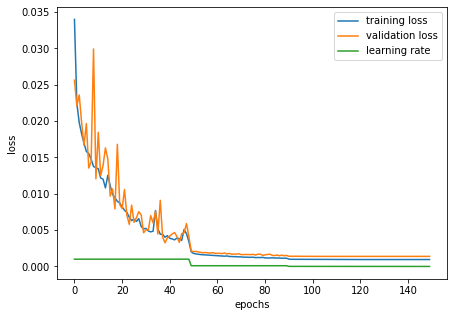

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,5))
plt.plot(res['accelANN_mean_squared_error_Nadam'][0]['loss'],label = 'training loss')
plt.plot(res['accelANN_mean_squared_error_Nadam'][0]['val_loss'],label = 'validation loss')
plt.plot(res['accelANN_mean_squared_error_Nadam'][0]['lr'],label = 'learning rate')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
#plt.ylim([0,0.004])

#Convert Model to tflite

In [5]:
from keras.models import load_model
trained_model = load_model('accelANN_mean_absolute_error_Nadam.hdf5')
trained_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 31)                992       
_________________________________________________________________
dense_221 (Dense)            (None, 64)                2048      
_________________________________________________________________
dense_222 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_223 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_224 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_225 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_226 (Dense)            (None, 128)             

In [7]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(trained_model)
tflite_model = converter.convert()
open('accel_mae_Nadam_model.tflite','wb').write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpquurp6wh/assets


1400528